# Description of Data

Given data set classifies people described by a set of attributes as good or bad credit risks.

1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)

## Basic Information about data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing given data set
df = pd.read_csv("credit.csv")

In [3]:
#displaying fist 5 values of all columns
pd.set_option('display.max_columns', None)
df.head()

checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  residence_since  \
0                     4.0         male single          none              4.0   
1                     2.0  female div/dep/mar          none              2.0   
2                     2.0         male single          none              3.0   
3                     2.0         male single     guarantor              4.0   
4                     3.0         male single          none              4.0   

  property_magnitude   age other_payment_plans   housing  existing_credits  \
0        real estate  67.0                none       own               2.0   
1        real estate  22.0                none       own               1.0   
2        real estate  49.0                none       own               1.0   
3     life insurance  45.0                none  for free               1.0   
4  no known property  53.0                none  for free               2.0   

                  job  num_dependents own_telephone foreign_worker class  
0             skilled             1.0           yes            yes  good  
1             skilled             1.0          none            yes   bad  
2  unskilled resident             2.0          none            yes  good  
3             skilled             2.0          none            yes  good  
4             skilled             2.0          none            yes   bad

In [4]:
#gives information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [5]:
#used to view some basic statistical details 
df.describe()

duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000          1.000000        1.000000  
50%      33.000000          1.000000        1.000000  
75%      42.000000          2.000000        1.000000  
max      75.000000          4.000000        2.000000

In [6]:
#categorising our dataset into numerical and categorical features
numerical_features = df.select_dtypes('number').columns.tolist()
categorical_features = df.select_dtypes('object').columns.tolist()
target = 'Class'

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')

There are 7 numerical features. They are: 
['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

There are 14 categorical features. They are: 
['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']

The target feature is: Class.


In [7]:
#checking for missing values
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [8]:
#unique values in categorical features
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {df[feature].nunique()} unique values. They are: ')
    print(df[feature].value_counts(normalize=True))
    print()

checking_status
----------------------------------------
There are 4 unique values. They are: 
checking_status
no checking    0.394
<0             0.274
0<=X<200       0.269
>=200          0.063
Name: proportion, dtype: float64

credit_history
----------------------------------------
There are 5 unique values. They are: 
credit_history
existing paid                     0.530
critical/other existing credit    0.293
delayed previously                0.088
all paid                          0.049
no credits/all paid               0.040
Name: proportion, dtype: float64

purpose
----------------------------------------
There are 10 unique values. They are: 
purpose
radio/tv               0.280
new car                0.234
furniture/equipment    0.181
used car               0.103
business               0.097
education              0.050
repairs                0.022
domestic appliance     0.012
other                  0.012
retraining             0.009
Name: proportion, dtype: float64

savings_

In [9]:
#unique values in numerical features
for feature in numerical_features:
    print(feature)
    print('-'*40)
    print(f'There are {df[feature].nunique()} unique values. They are: ')
    print(df[feature].value_counts(normalize=True))
    print()

duration
----------------------------------------
There are 33 unique values. They are: 
duration
24.0    0.184
12.0    0.179
18.0    0.113
36.0    0.083
6.0     0.075
15.0    0.064
9.0     0.049
48.0    0.048
30.0    0.040
21.0    0.030
10.0    0.028
60.0    0.013
27.0    0.013
42.0    0.011
11.0    0.009
20.0    0.008
8.0     0.007
4.0     0.006
45.0    0.005
7.0     0.005
39.0    0.005
14.0    0.004
13.0    0.004
33.0    0.003
28.0    0.003
54.0    0.002
16.0    0.002
22.0    0.002
47.0    0.001
5.0     0.001
26.0    0.001
72.0    0.001
40.0    0.001
Name: proportion, dtype: float64

credit_amount
----------------------------------------
There are 921 unique values. They are: 
credit_amount
1478.0    0.003
1262.0    0.003
1258.0    0.003
1275.0    0.003
1393.0    0.003
          ...  
1459.0    0.001
882.0     0.001
3758.0    0.001
1136.0    0.001
4576.0    0.001
Name: proportion, Length: 921, dtype: float64

installment_commitment
----------------------------------------
There are 

In [10]:
#Returns number of unique values for chosen feature
print(df['class'].unique())
print(df.groupby('class').size())

['good' 'bad']
class
bad     300
good    700
dtype: int64


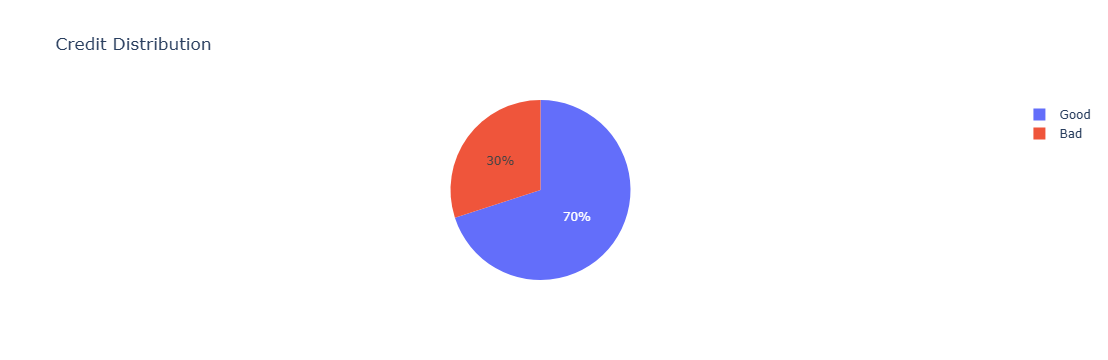

In [11]:
#pie chart representation of credit class
import plotly.express as px
numbers = [700, 300]
names = ['Good', 'Bad']
fig = px.pie(values=numbers, names=names, title='Credit Distribution')
fig.show()

### Pointers

1. Class is our target variable, based on which we will analyse good or bad credit.

2. There are some variables that might affect class : employment, age, credit history, saving status, duration, existing credits, purpose.

3. 70% people have good credit and 30% people have bad credit.

4. Majority are foreign workers and most loans are taken for a Radio or TV.

## Graphical Representation

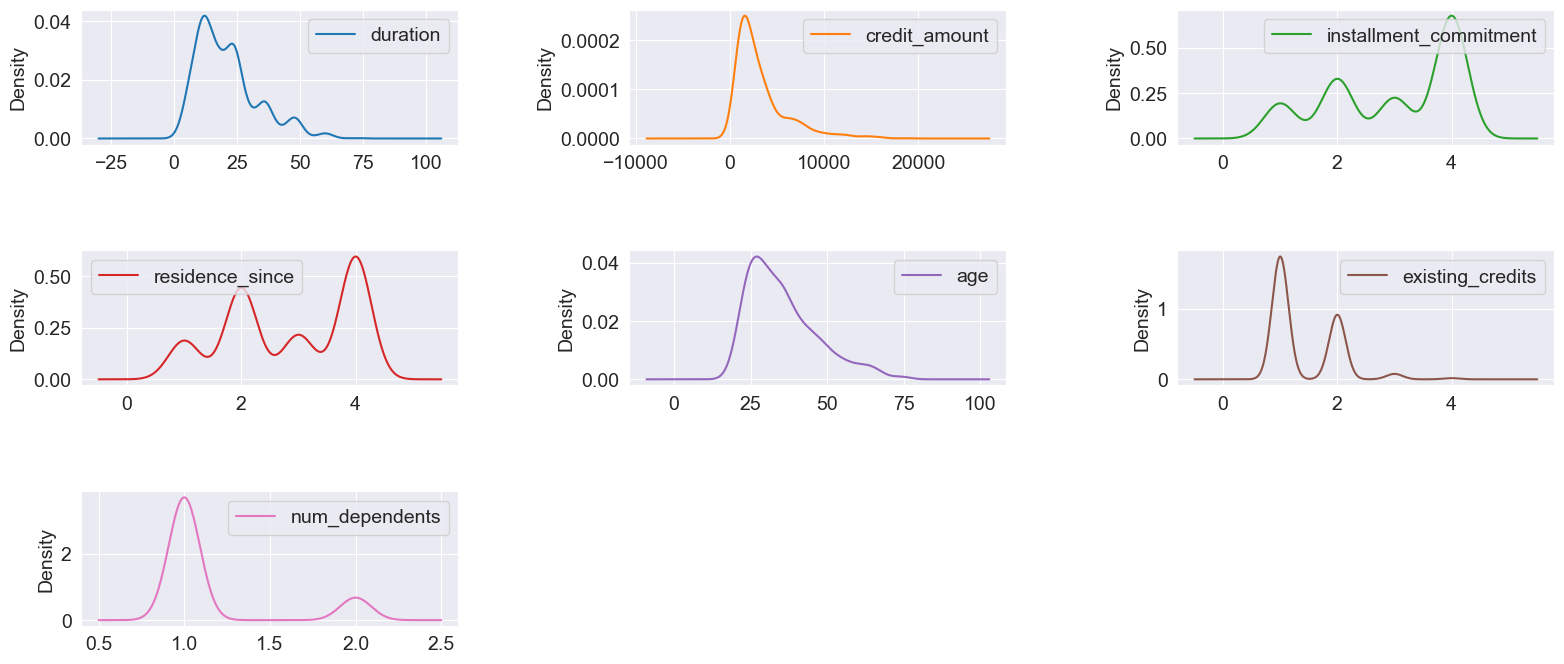

In [12]:
#plotting densoty plots
plt.rcParams["figure.figsize"] = [17,8]
df_num = df.select_dtypes(include = np.number )
df_num.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.tight_layout(pad = 4)
plt.show()

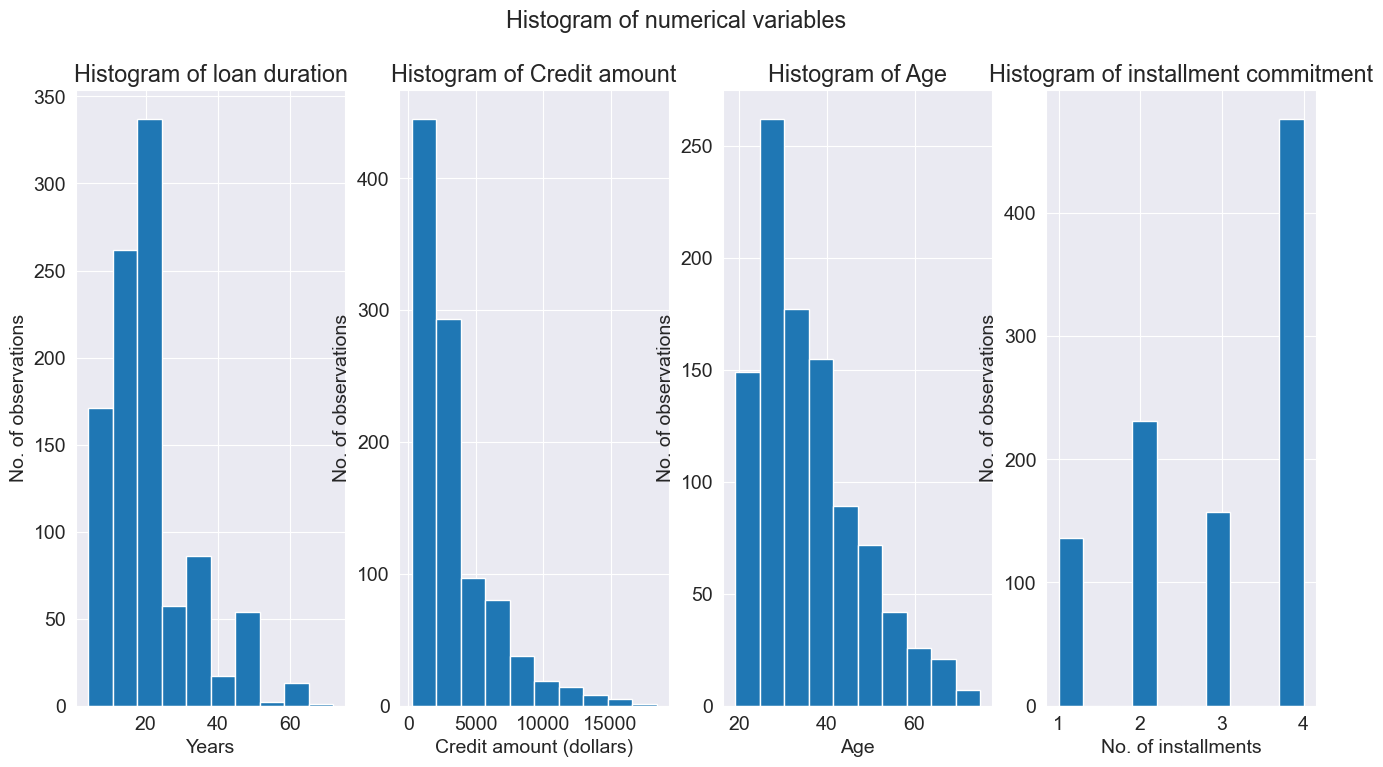

In [13]:
# histograms of numerical variables
fig, axes = plt.subplots(1,4, figsize=(16,8))
plt.suptitle('Histogram of numerical variables')
axes[0].hist(df['duration'])
axes[0].set_ylabel('No. of observations')
axes[0].set_xlabel('Years')
axes[0].set_title('Histogram of loan duration');

axes[1].hist(df['credit_amount'])
axes[1].set_ylabel('No. of observations')
axes[1].set_xlabel('Credit amount (dollars)')
axes[1].set_title('Histogram of Credit amount');

axes[2].hist(df['age'])
axes[2].set_ylabel('No. of observations')
axes[2].set_xlabel('Age')
axes[2].set_title('Histogram of Age');

axes[3].hist(df['installment_commitment'])
axes[3].set_ylabel('No. of observations')
axes[3].set_xlabel('No. of installments')
axes[3].set_title('Histogram of installment commitment');

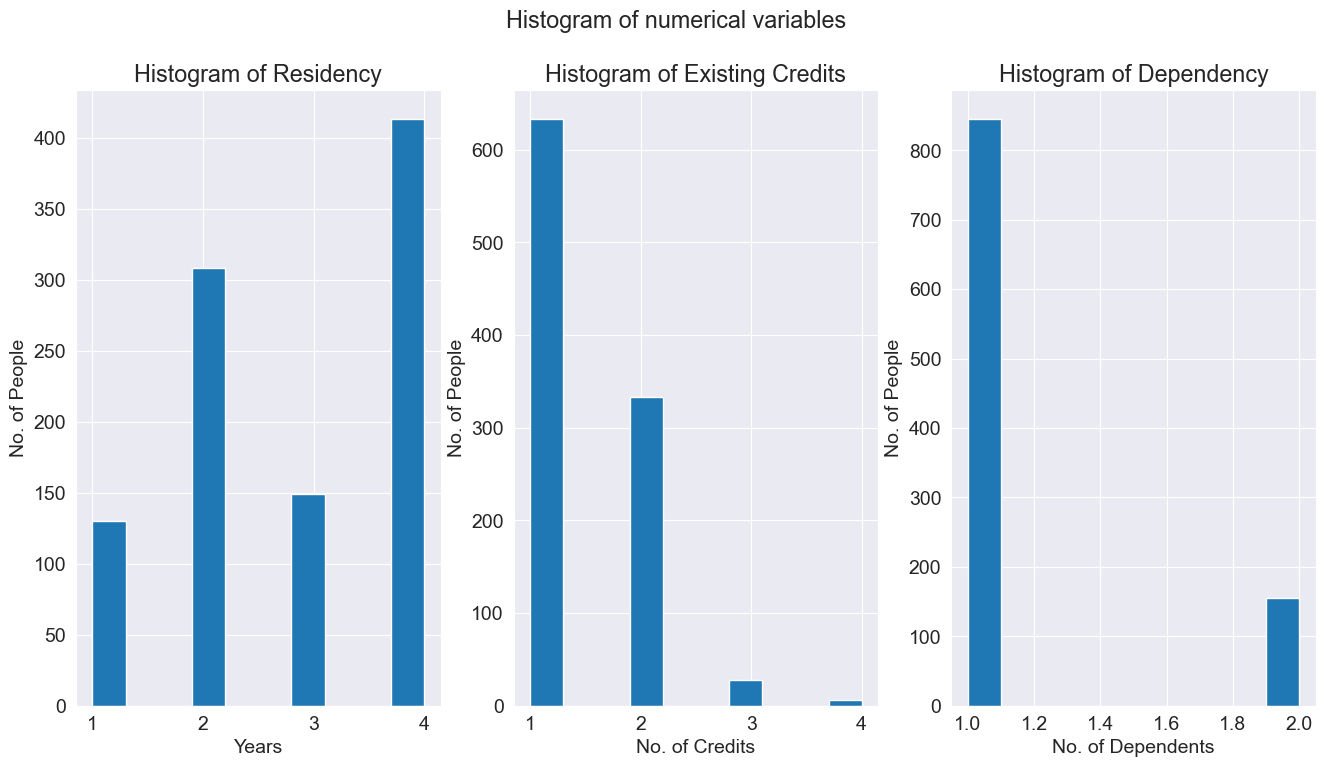

In [14]:
fig, axes = plt.subplots(1,3, figsize=(16,8))

plt.suptitle('Histogram of numerical variables')

axes[0].hist(df['residence_since'])
axes[0].set_xlabel('Years')
axes[0].set_ylabel('No. of People')
axes[0].set_title('Histogram of Residency');

axes[1].hist(df['existing_credits'])
axes[1].set_xlabel('No. of Credits')
axes[1].set_ylabel('No. of People')
axes[1].set_title('Histogram of Existing Credits');

axes[2].hist(df['num_dependents'])
axes[2].set_xlabel('No. of Dependents')
axes[2].set_ylabel('No. of People')
axes[2].set_title('Histogram of Dependency');

In [15]:
#Define a function to plot the categories of the variable and find the category with highest frequency
def cat_plot(variable):
    plt.figure(figsize=(15,8))                                               # set the plot size
    sns.countplot(x = df[variable])                                          # plot a countplot of a variable
    plt.title('Count of Categories of a Variable', fontsize = 15)            # add plot title and set text size
    plt.xlabel(variable, fontsize = 15)                                      # set the x-axis label and the text size
    plt.ylabel('Count', fontsize = 15)                                       # set the y-axis label and the text size
    plt.show()                                                               # display the plot
    for cat, val in df[variable].value_counts().items():                 # use for loop 
        print('The category', cat, 'has frequency', val)                     # print the category with highest frequency
        break  

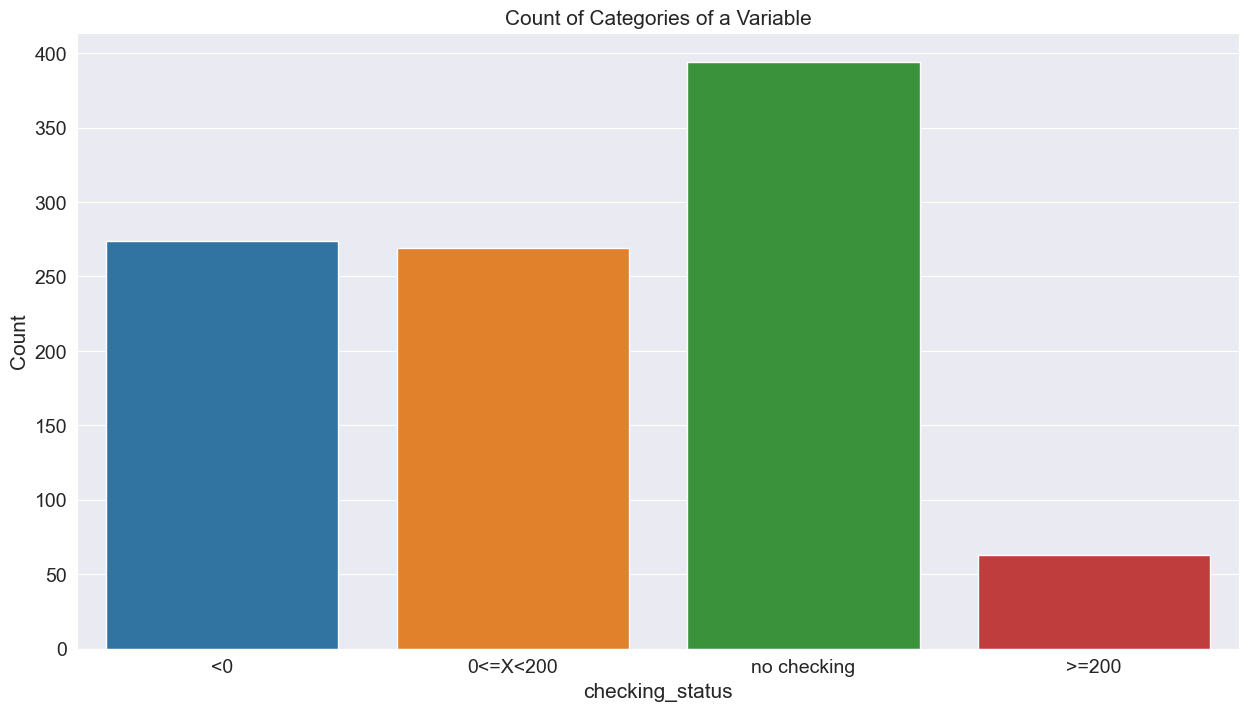

The category no checking has frequency 394


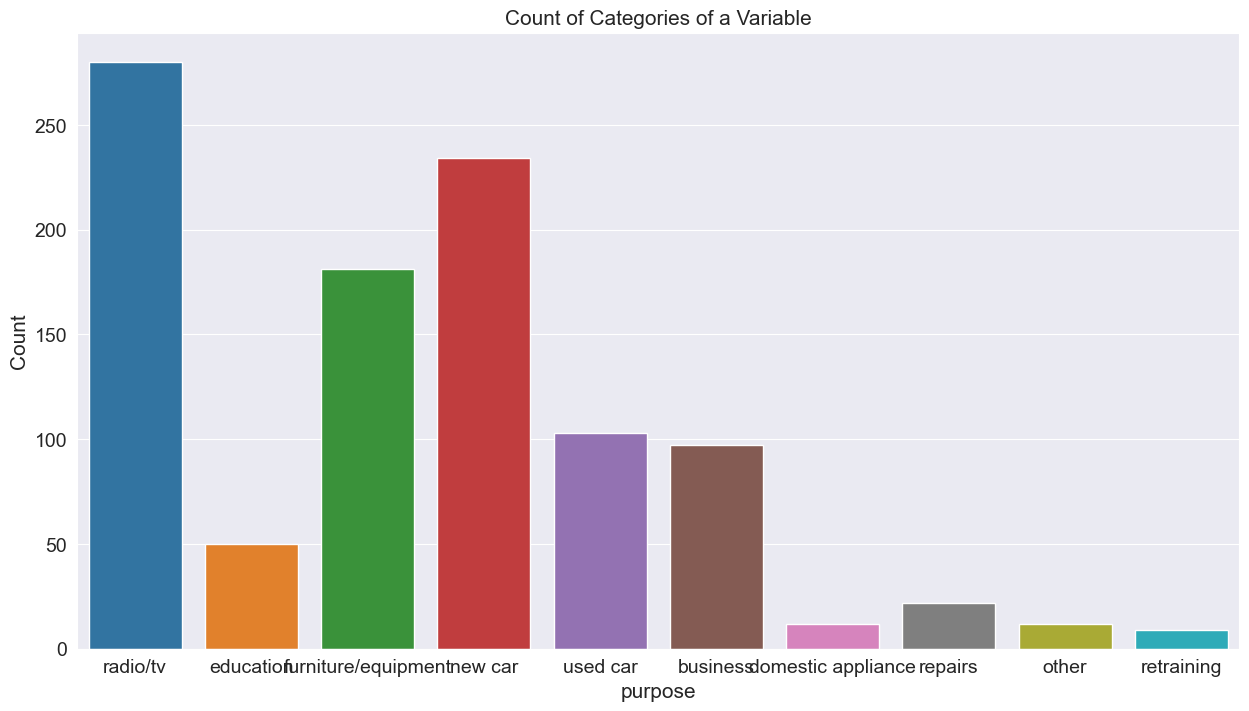

The category radio/tv has frequency 280


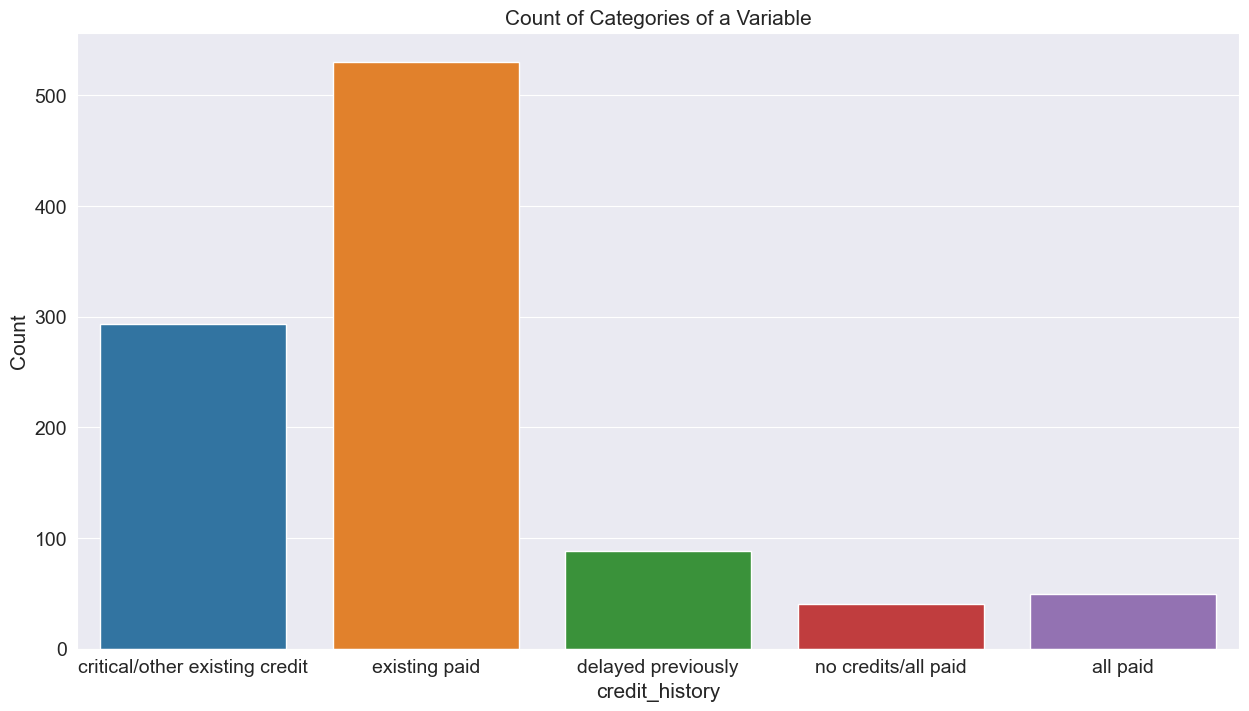

The category existing paid has frequency 530


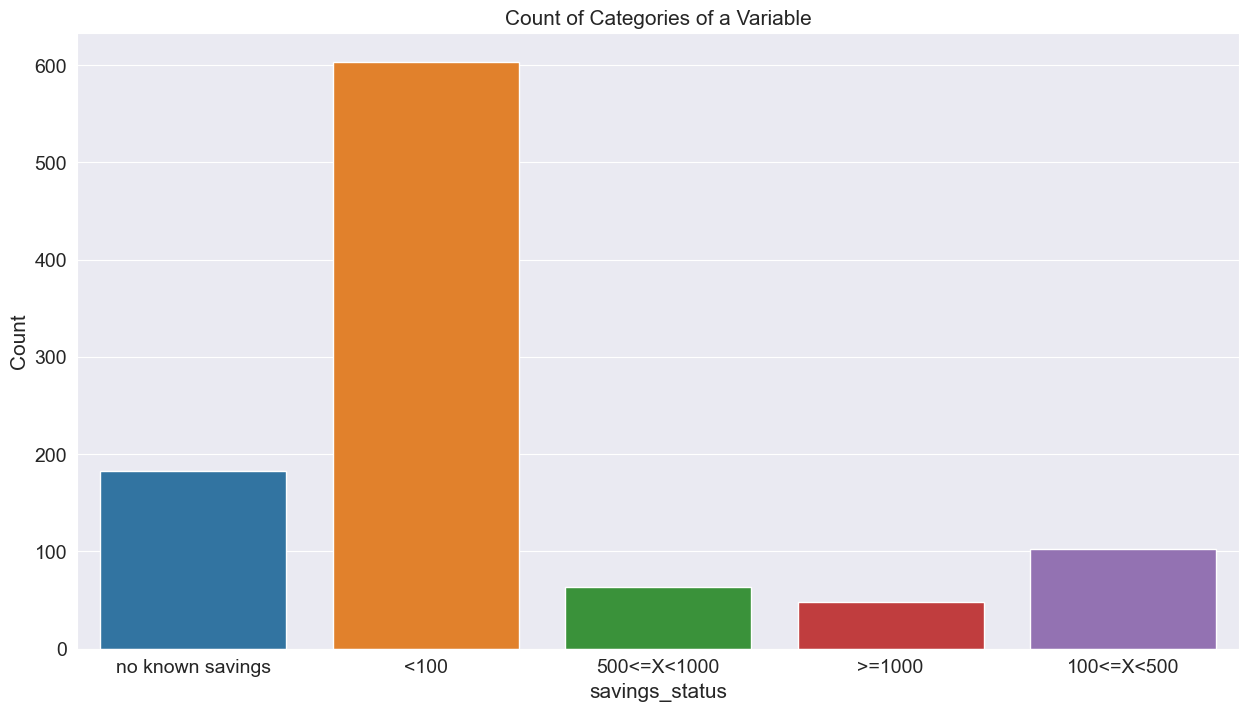

The category <100 has frequency 603


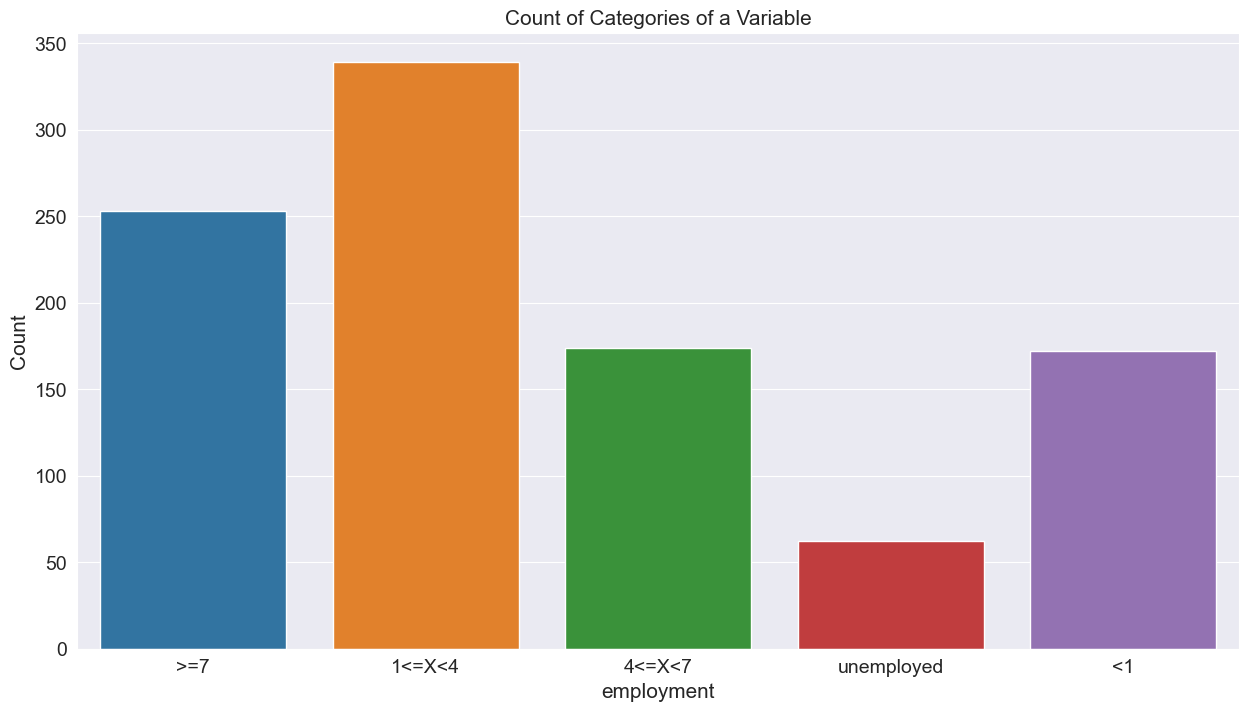

The category 1<=X<4 has frequency 339


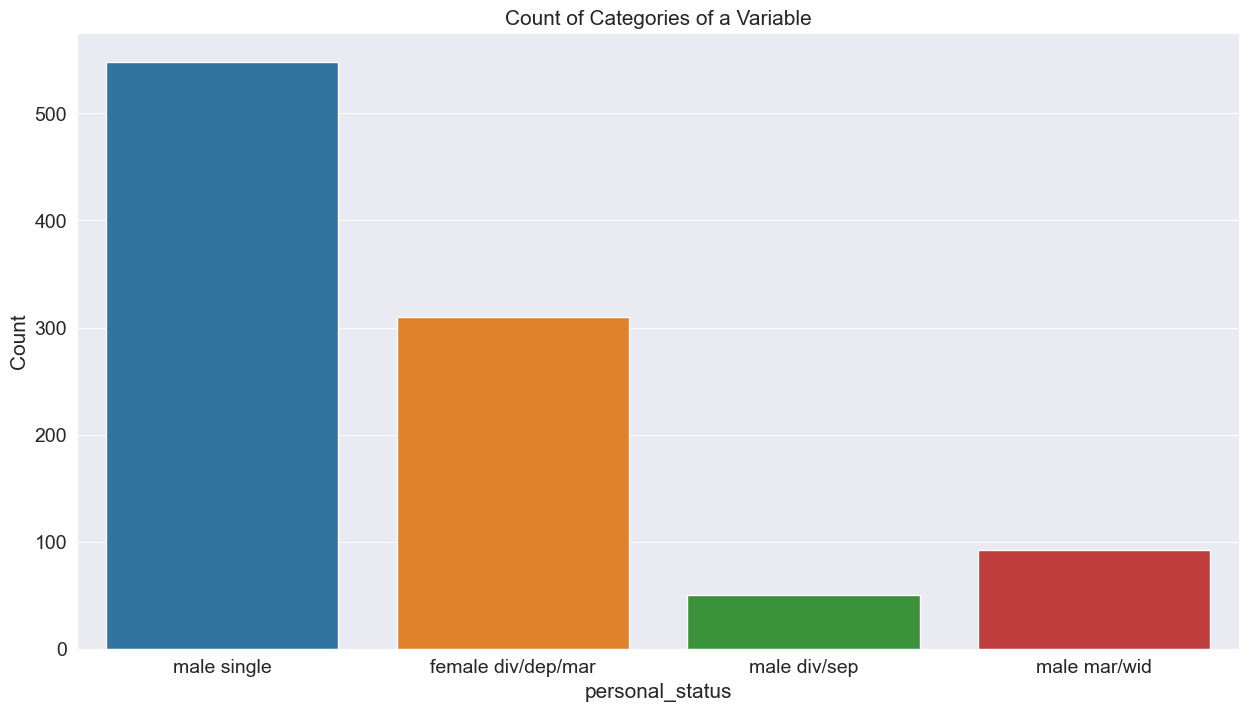

The category male single has frequency 548


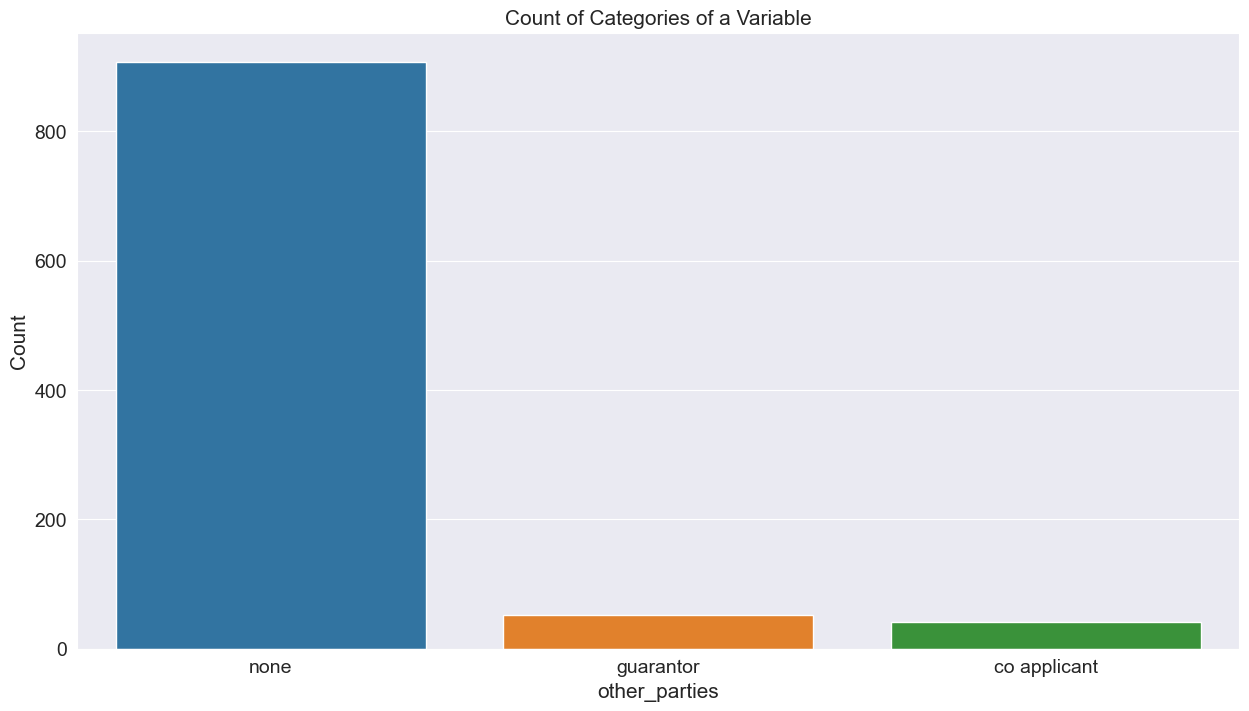

The category none has frequency 907


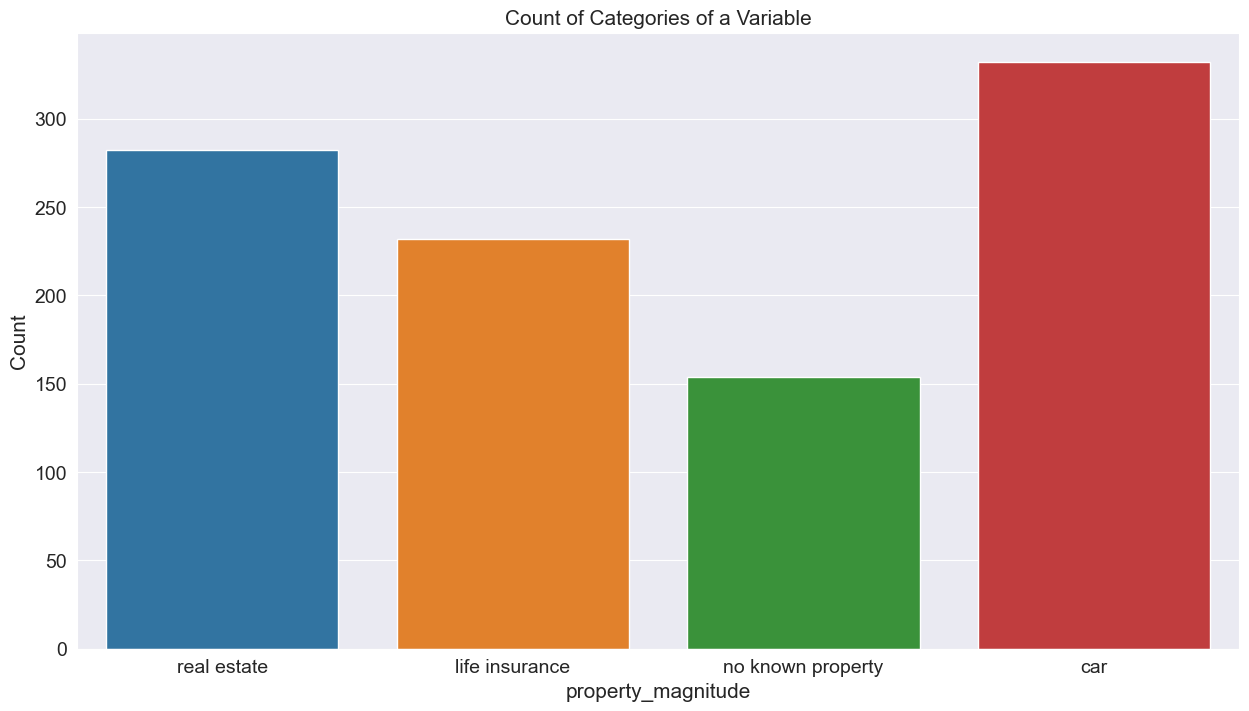

The category car has frequency 332


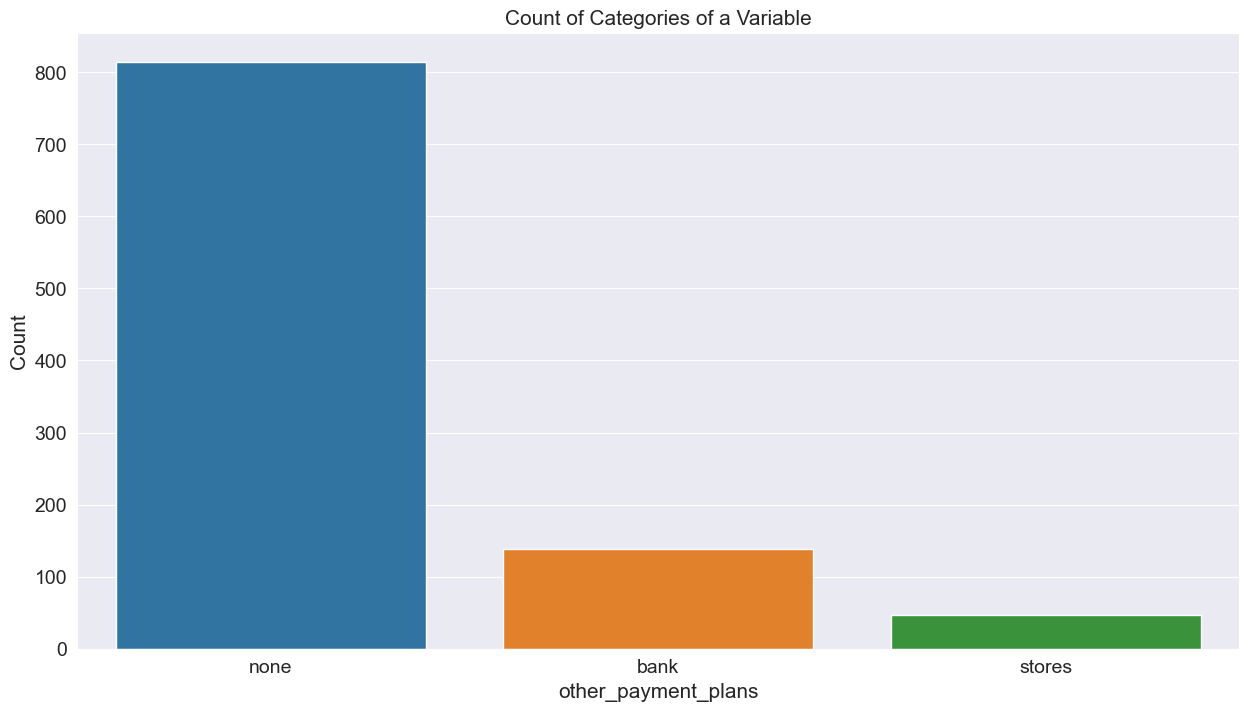

The category none has frequency 814


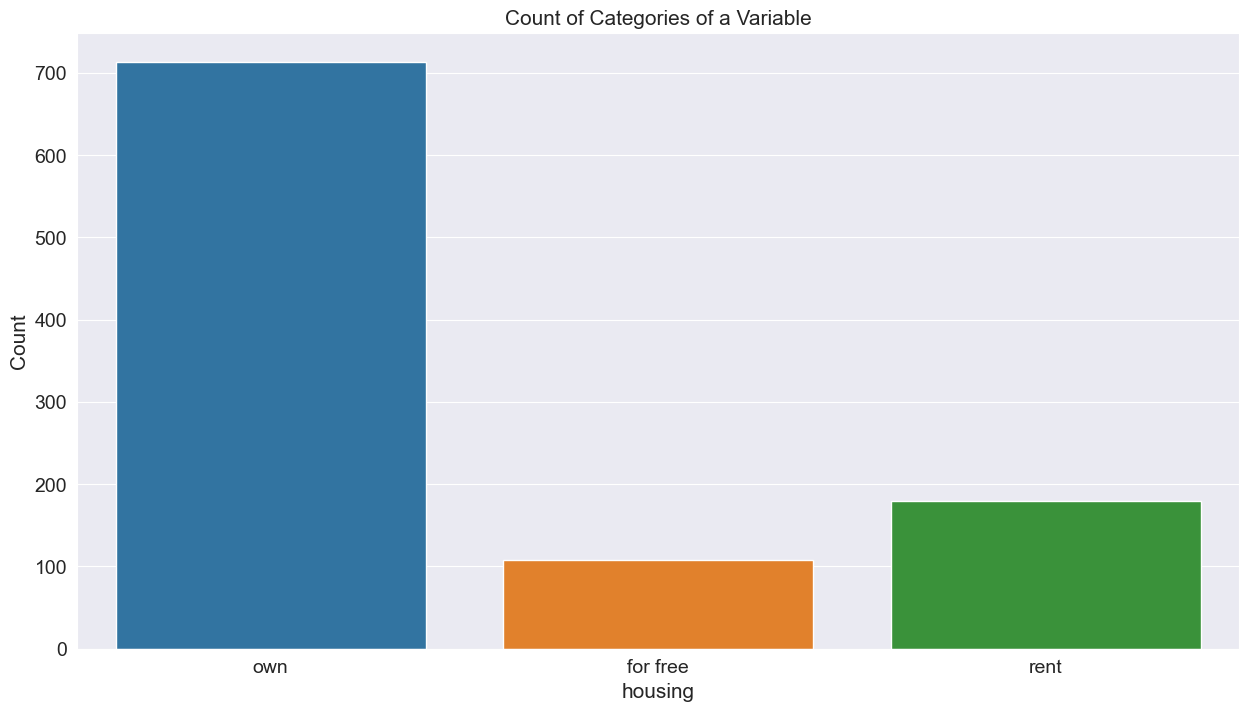

The category own has frequency 713


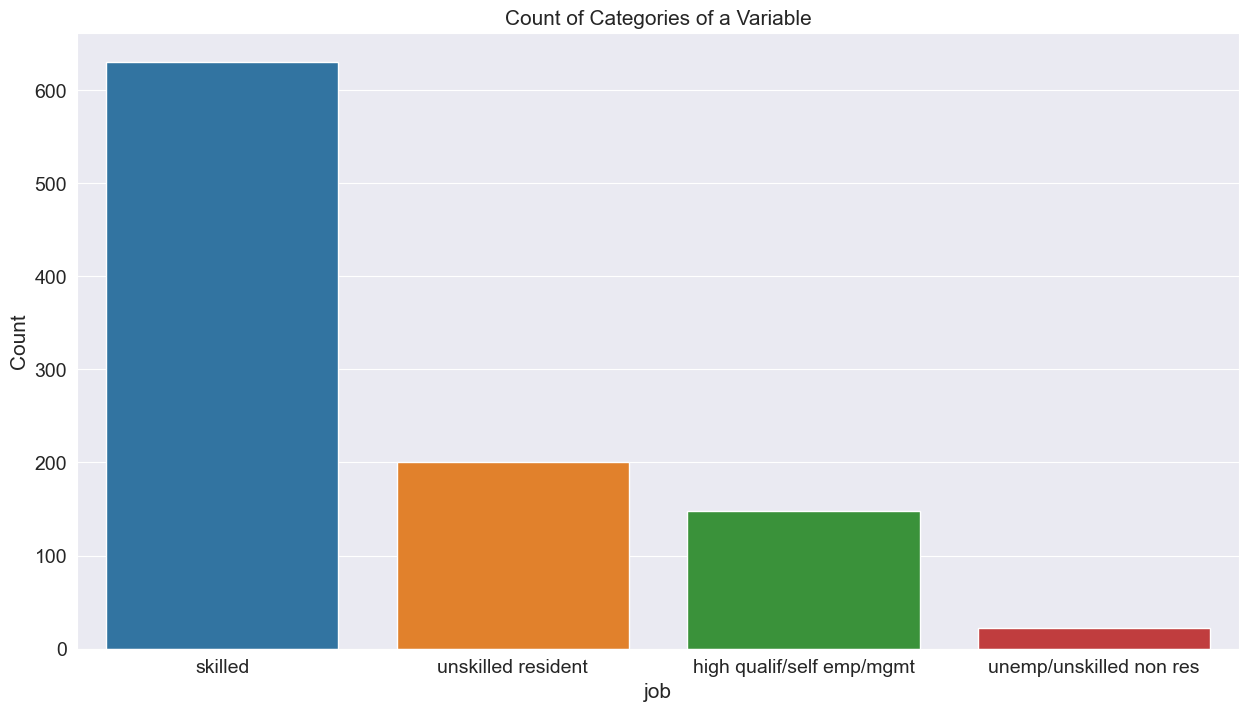

The category skilled has frequency 630


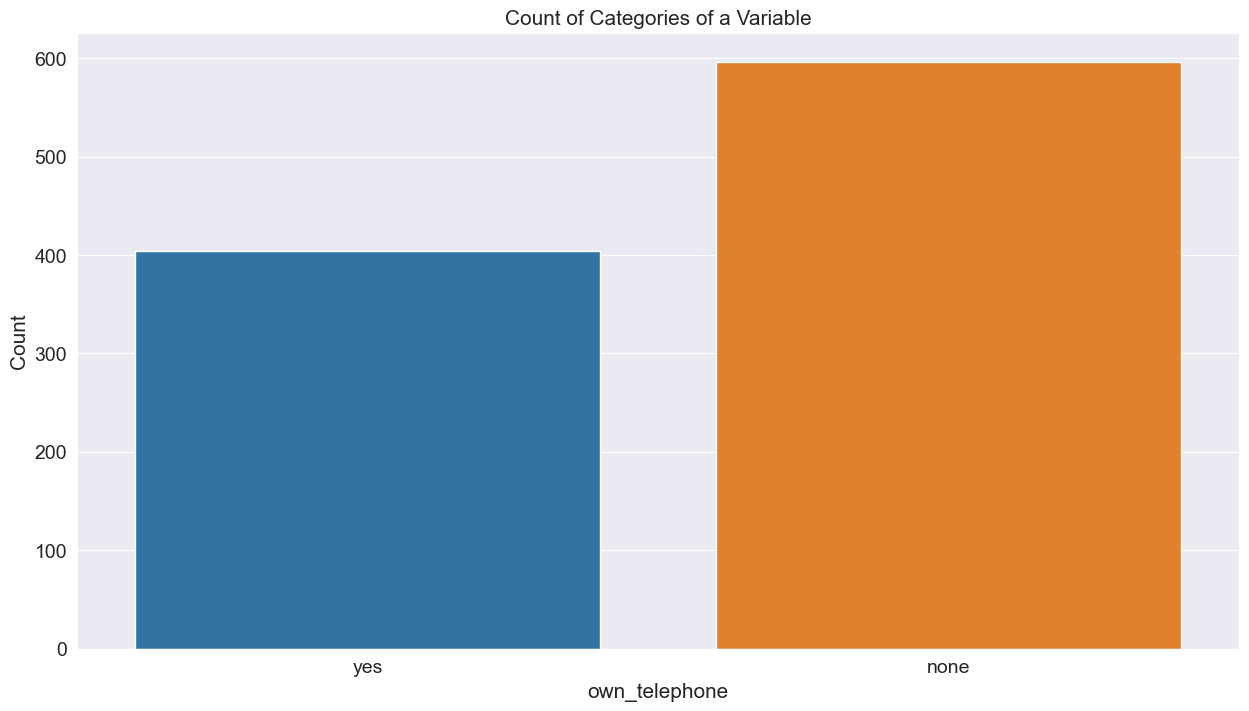

The category none has frequency 596


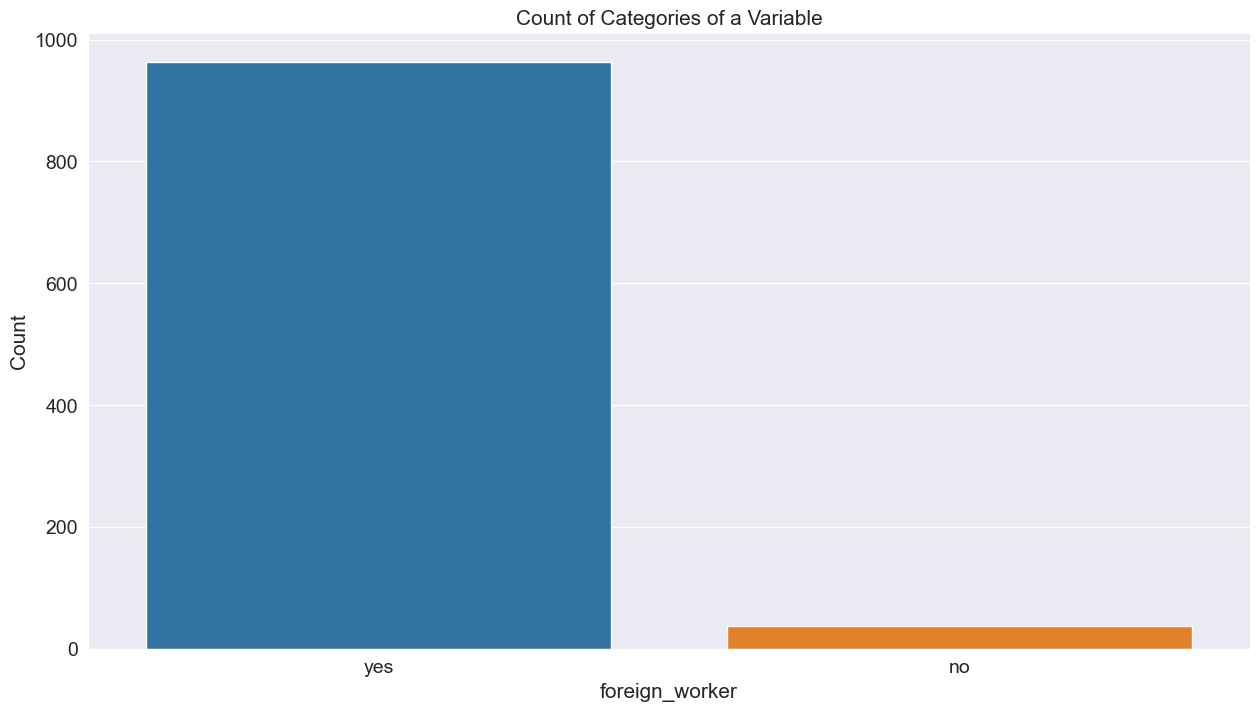

The category yes has frequency 963


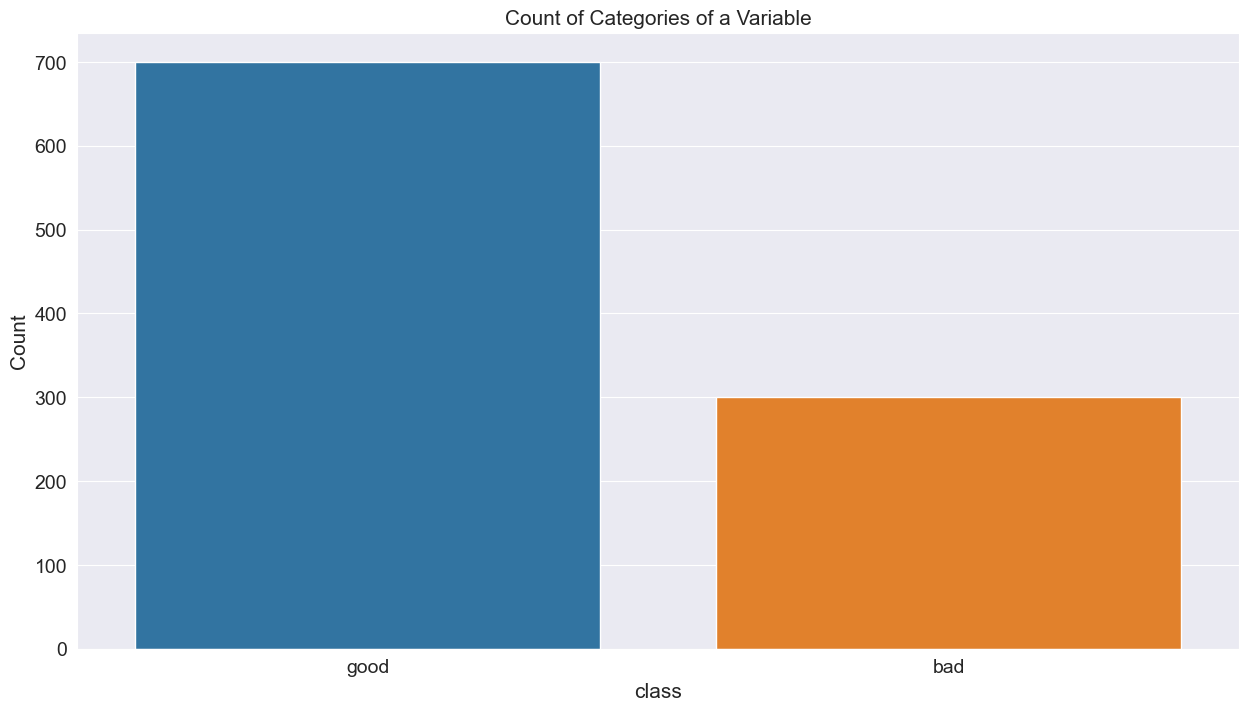

The category good has frequency 700


In [16]:
cat_plot('checking_status')
cat_plot('purpose')
cat_plot('credit_history')
cat_plot('savings_status')
cat_plot('employment')
cat_plot('personal_status')
cat_plot('other_parties')
cat_plot('property_magnitude')
cat_plot('other_payment_plans')
cat_plot('housing')
cat_plot('job')
cat_plot('own_telephone')
cat_plot('foreign_worker')
cat_plot('class')

## Data Cleaning and Preparation

We will convert categorical variables into binary numbers and ranges into numbers based on their mean for easier calculations

In [17]:
#make a copy of given dataset
df_copy = df.copy()

In [18]:
# Create a new column for gender that extracts the "male" and "female" from personal_status
df_copy['gender'] = df_copy['personal_status'].apply(lambda x: 'female' if 'female' in x else 'male')

In [19]:
# Dictionary that maps class values as bad = 0, good = 1
class_map = {"bad" : 0, "good" : 1}

# Dictionary that maps gender values as male = 0, female = 1
gender_map = {"male" : 0, "female" : 1}

# Dictionary that maps savings account values to lower edge of range
savings_status_map = {"no known savings" : 0, "<100" : 1, "500<=X<1000" : 500, ">=1000" : 1000, "100<=X<500" : 100}

# Dictionary that maps checking account values to lower edge of range. Two of these seem to represent "0"
checking_status_map = {"<0" : 0, "0<=X<200" : 1, "no checking" : 0, ">=200" : 200}

# Dictionary that maps employment values to lower edge of range, now representing "whole years". Less than 1 year ends up as 0 as well
employment_map = {">=7" : 7, "1<=X<4" : 1, "4<=X<7" : 4, 'unemployed' : 0, "<1" : 0}

In [20]:
# Create new columns and map the new values using the dictionaries
df_copy['class_copy'] = df_copy['class'].map(class_map)
df_copy['gender_copy'] = df_copy['gender'].map(gender_map)
df_copy['savings_status_copy'] = df_copy['savings_status'].map(savings_status_map)
df_copy['checking_status_copy'] = df_copy['checking_status'].map(checking_status_map)
df_copy['employment_copy'] = df_copy['employment'].map(employment_map)

In [21]:
df_copy[['class','class_copy','gender','gender_copy','savings_status','savings_status_copy','checking_status','checking_status_copy','employment','employment_copy']].sample(20)

class  class_copy  gender  gender_copy    savings_status  \
893  good           1    male            0              <100   
64   good           1  female            1              <100   
508  good           1    male            0              <100   
419   bad           0  female            1  no known savings   
911   bad           0  female            1              <100   
71   good           1    male            0  no known savings   
739   bad           0  female            1        100<=X<500   
92    bad           0  female            1  no known savings   
650  good           1    male            0              <100   
363  good           1    male            0              <100   
681  good           1    male            0  no known savings   
726  good           1    male            0       500<=X<1000   
339  good           1    male            0              <100   
544  good           1    male            0              <100   
904  good           1    male            0              <100   
319  good           1  female            1              <100   
209  good           1    male            0            >=1000   
163  good           1    male            0              <100   
831   bad           0  female            1              <100   
87    bad           0    male            0        100<=X<500   

     savings_status_copy checking_status  checking_status_copy  employment  \
893                    1        0<=X<200                     1      1<=X<4   
64                     1     no checking                     0          <1   
508                    1     no checking                     0      1<=X<4   
419                    0        0<=X<200                     1      1<=X<4   
911                    1        0<=X<200                     1          <1   
71                     0     no checking                     0         >=7   
739                  100        0<=X<200                     1      1<=X<4   
92                     0     no checking                     0         >=7   
650                    1              <0                     0      4<=X<7   
363                    1     no checking                     0      1<=X<4   
681                    0     no checking                     0      1<=X<4   
726                  500     no checking                     0      1<=X<4   
339                    1        0<=X<200                     1      1<=X<4   
544                    1     no checking                     0         >=7   
904                    1     no checking                     0         >=7   
319                    1              <0                     0         >=7   
209                 1000     no checking                     0      4<=X<7   
163                    1        0<=X<200                     1  unemployed   
831                    1              <0                     0          <1   
87                   100        0<=X<200                     1      1<=X<4   

     employment_copy  
893                1  
64                 0  
508                1  
419                1  
911                0  
71                 7  
739                1  
92                 7  
650                4  
363                1  
681                1  
726                1  
339                1  
544                7  
904                7  
319                7  
209                4  
163                0  
831                0  
87                 1

## Correlations

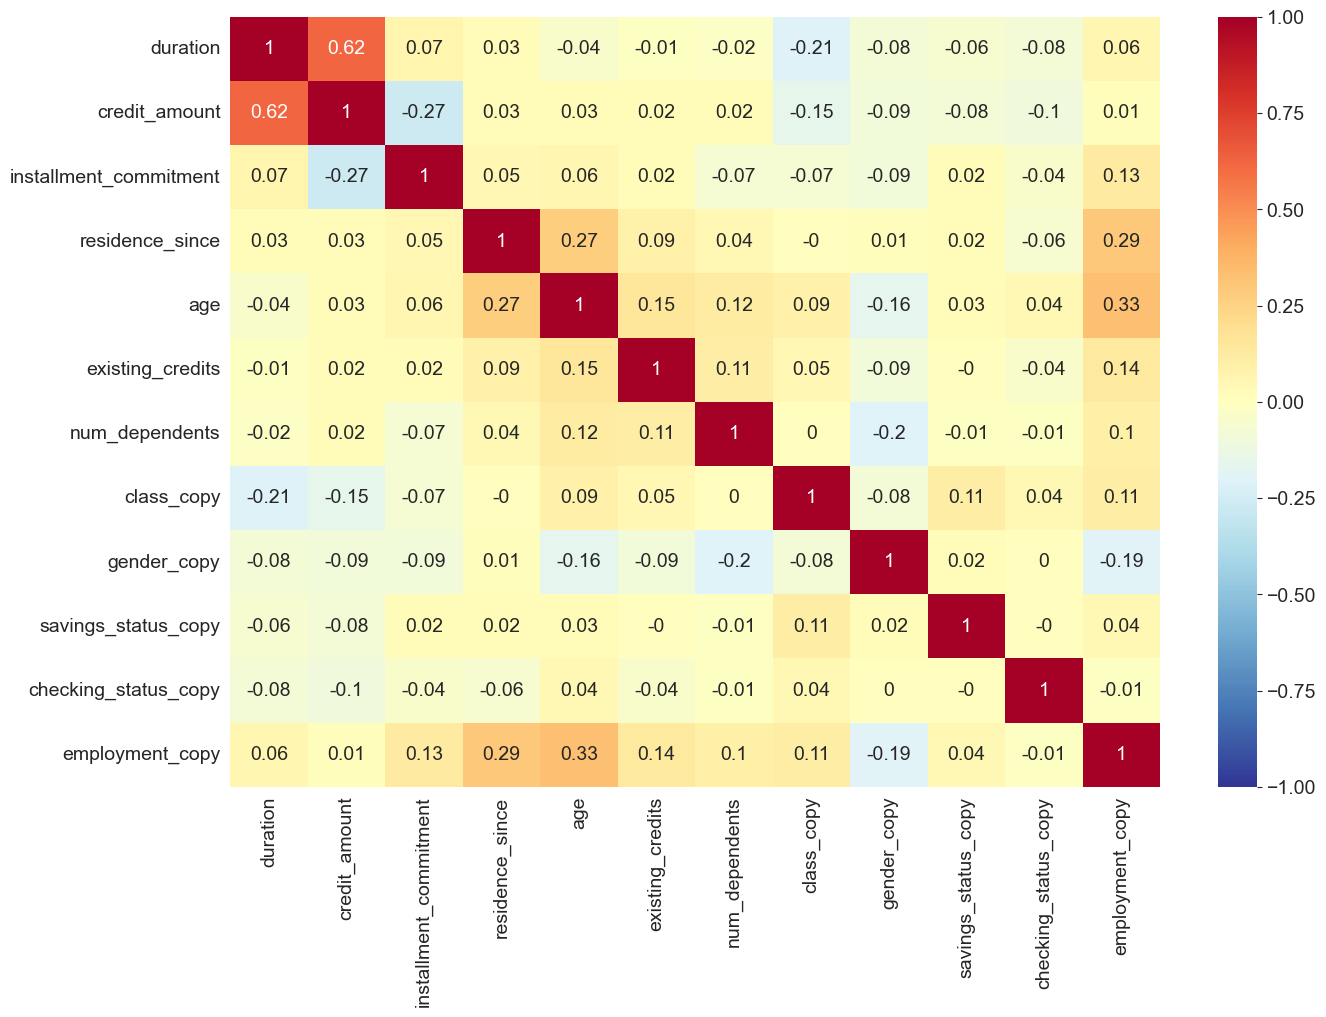

In [22]:
# Create the correlation, rounding decimels to 3
corr = round(df_copy.corr(numeric_only=True), 2)

# Plot the correlation using sns.heatmap
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.RdYlBu_r, vmin=-1, vmax=1)
plt.show()

### Pointers

* **Credit Amount vs. Duration** have the most positive correlation, which is strong at **0.62**
* **Credit Amount vs. Installment Commitment** have the most negative correlation, which is weak at **-0.27**

 **Credit Class** is the main variable of this dataset. As indicated in the description of this exercise, customers are classifed as having either "good" credit risk or "bad" credit risk, based on other attributes in this data set. We made some hypotheses earlier about what might be affecting credit class :

* **Duration vs. Class (Encoded)** has the most negative correlation, which is weak at **-0.21**.
* **Credit Amount vs. Class (Encoded)** also has a weak neagive correlation at **-0.15**.
* **Savings Status (Encoded) vs. Class (Encoded)** has a weak positive correlation at **0.11**. 
* **Employment (Encoded) vs. Class (Encoded)** has a weak positive correlation, also at **0.11**.

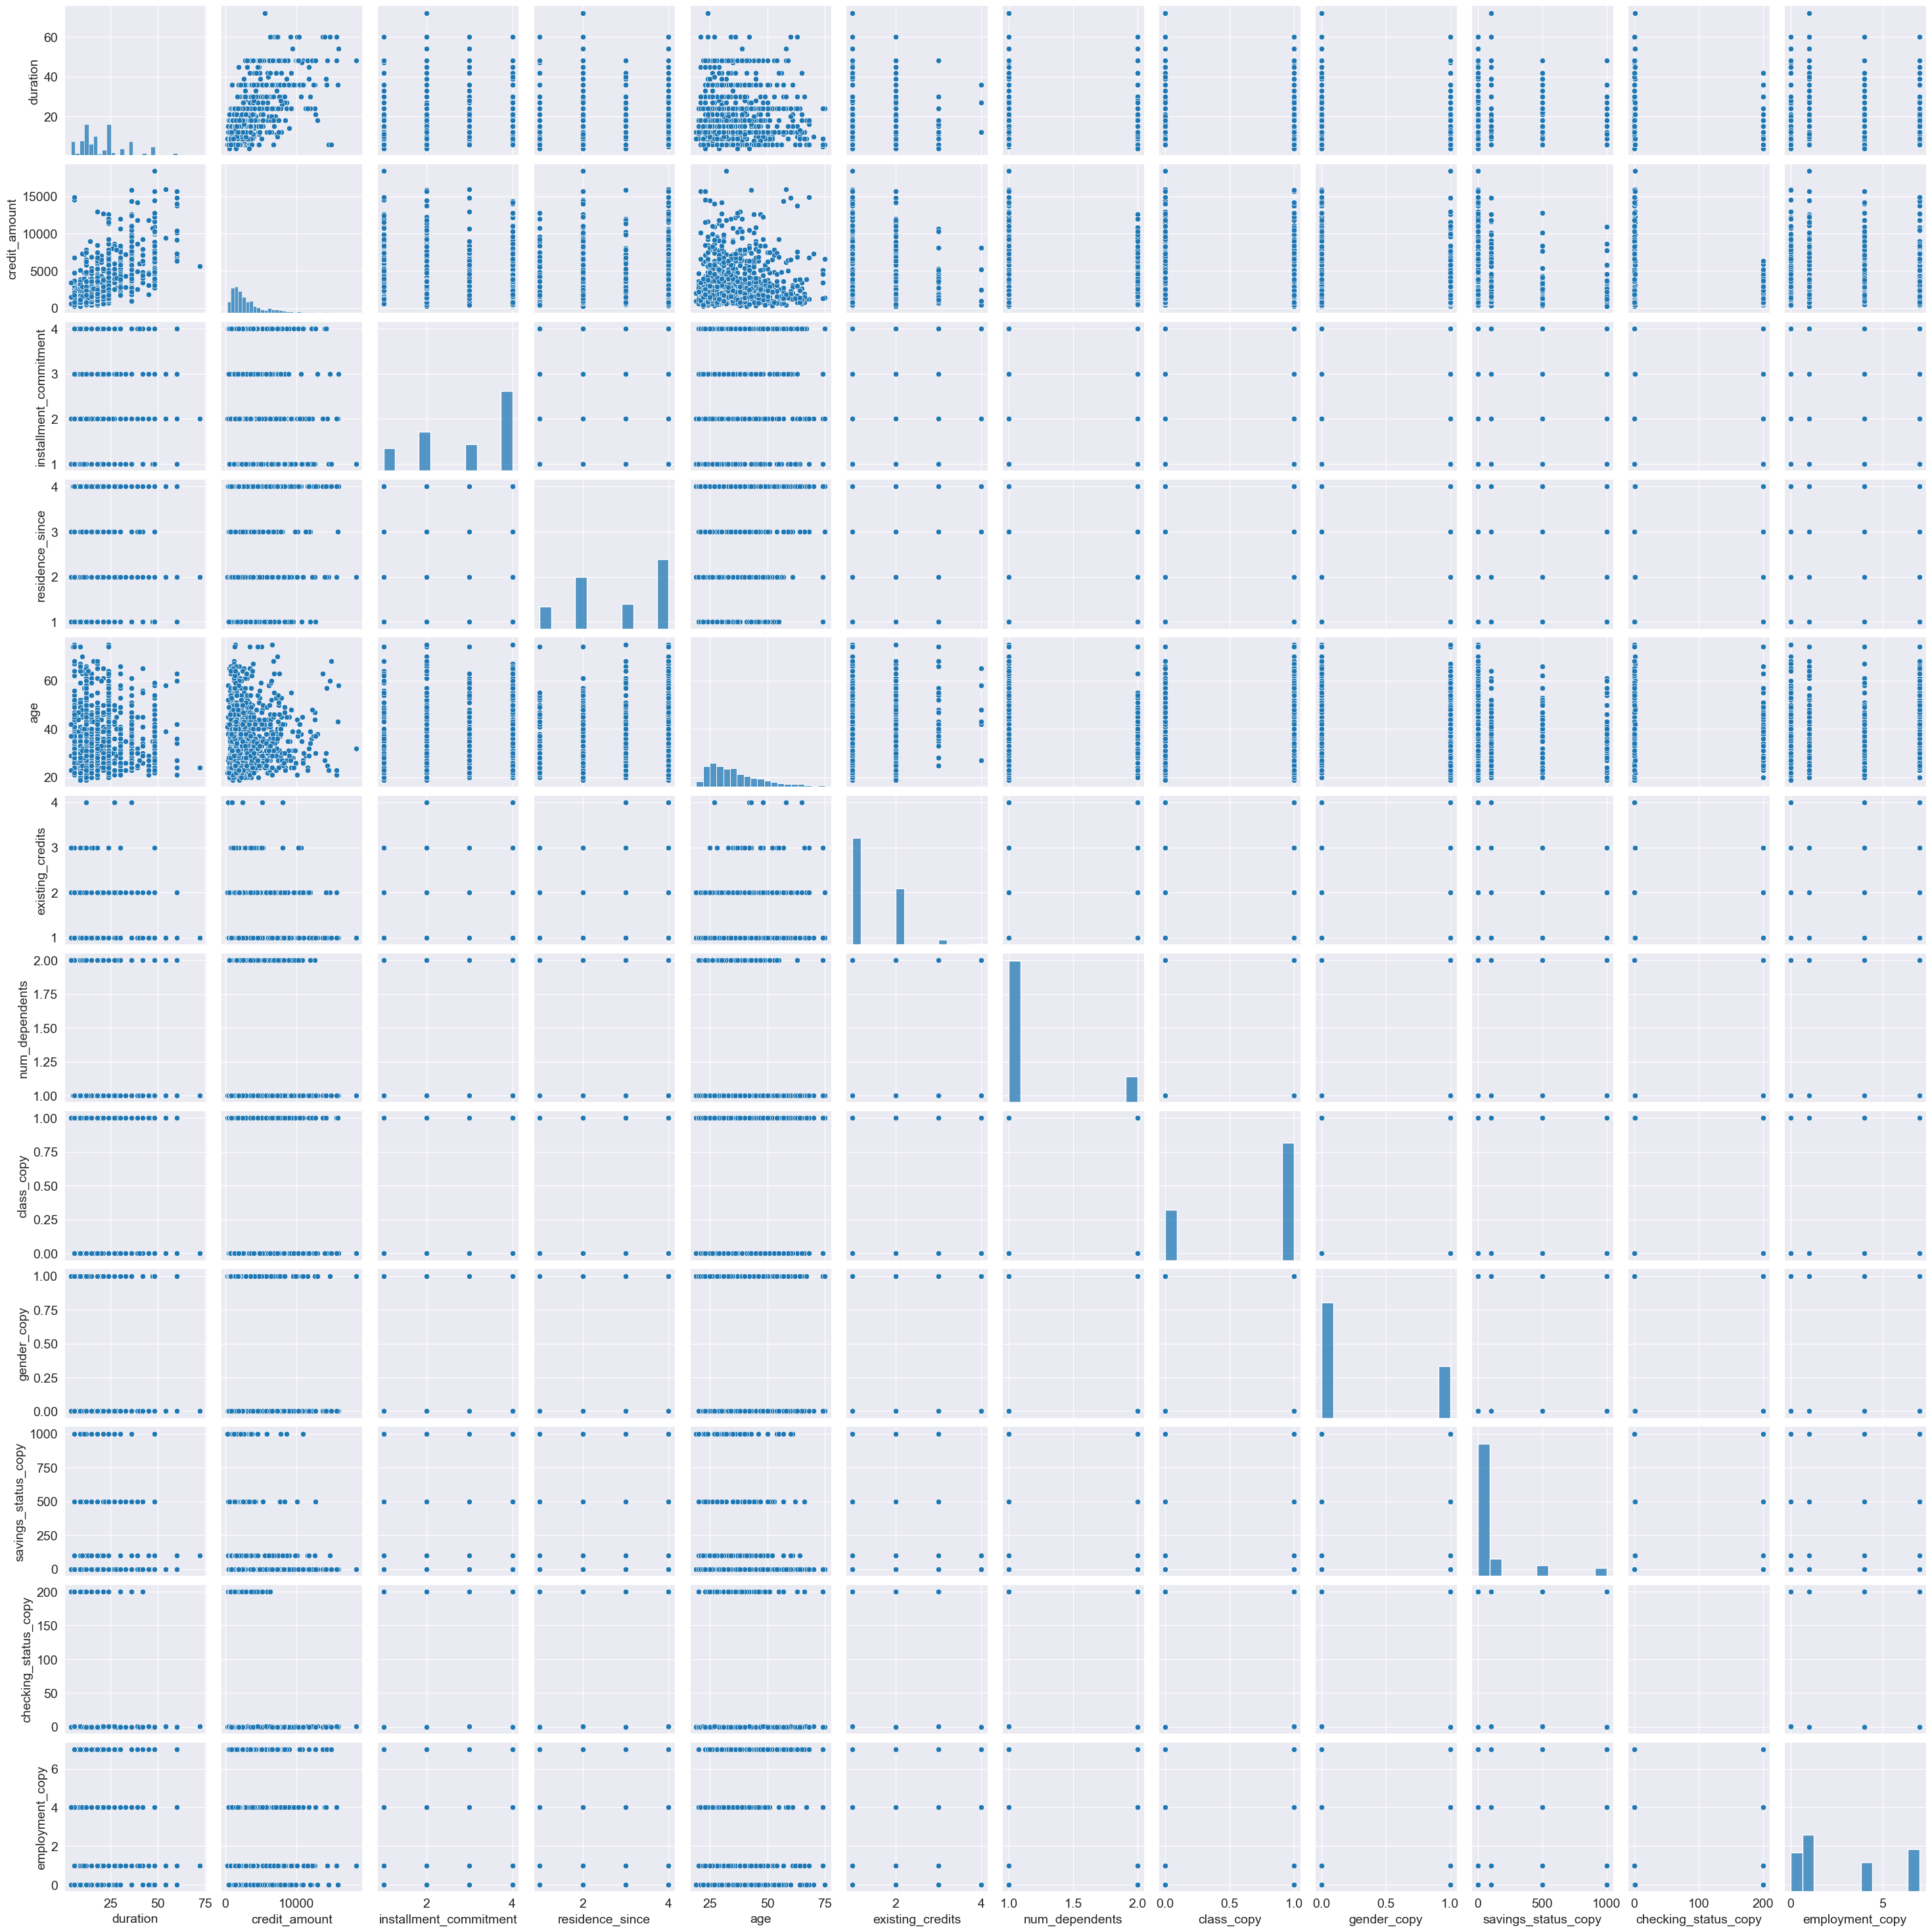

In [23]:
#pair plots for all variables to see individual correlations
#this takes a little longer time to load , so be patient !
sns.pairplot(df_copy)
plt.show()  

## Multi Variate Analysis

### Duration v/s Credit Amount

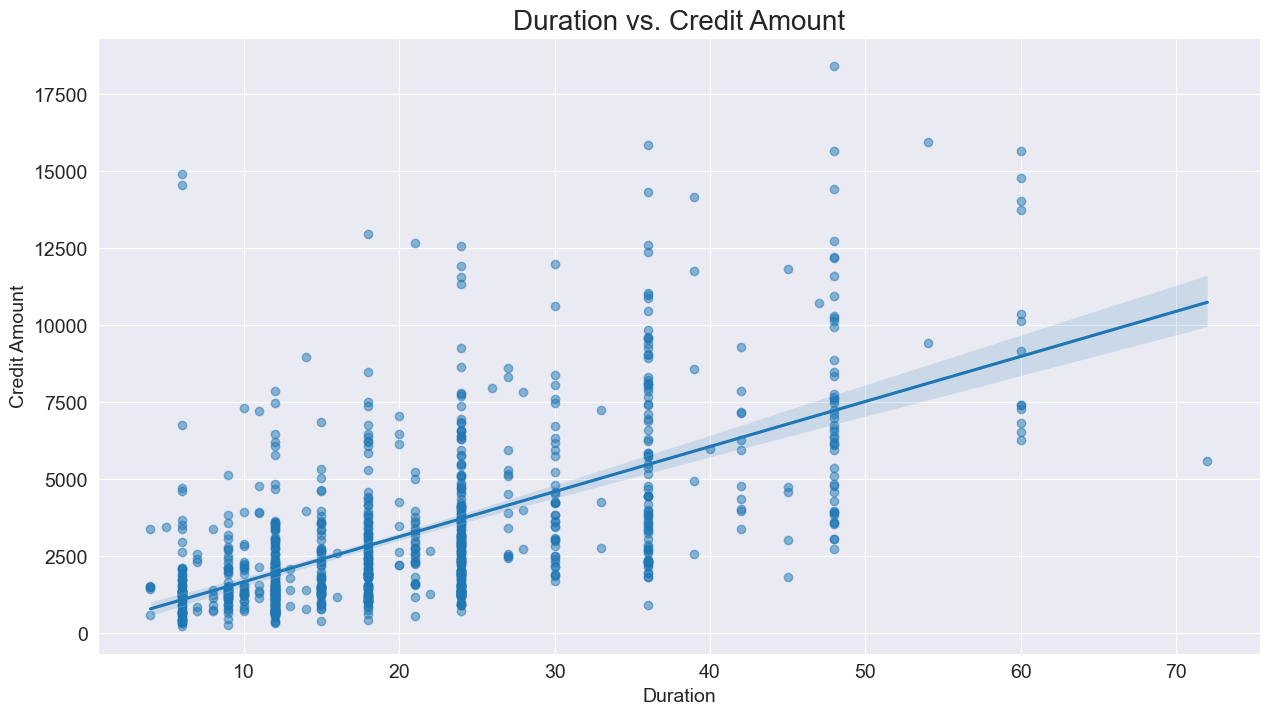

In [24]:
# Plot regression chart for Duration v/s Credit Amount
plt.figure(figsize=(15, 8))
sns.regplot(data=df, x='duration', y='credit_amount', scatter_kws={'alpha' : 0.5})
plt.title('Duration vs. Credit Amount', fontsize=20)
plt.ylabel('Credit Amount', fontsize=14)
plt.xlabel('Duration', fontsize=14)
plt.show()

### Installment Commitment v/s Credit Amount

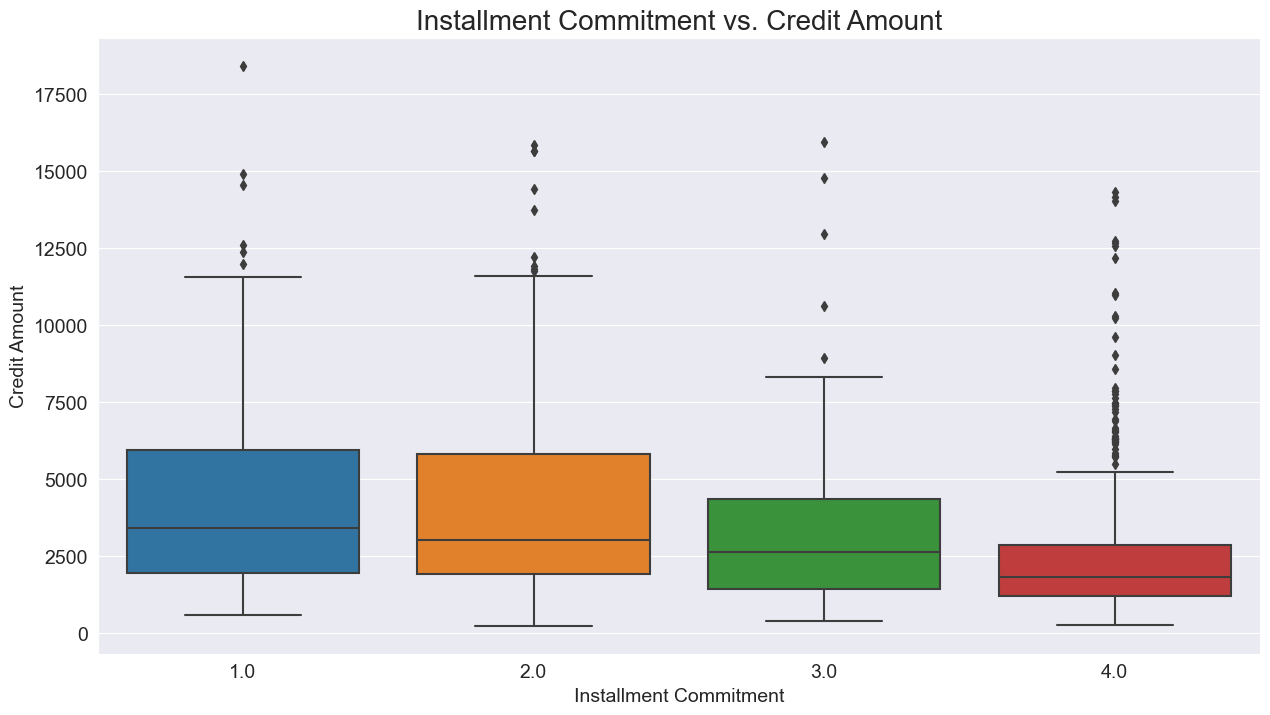

In [25]:
# Plot box plot chart for Installment Commitment v/s Credit Amount
plt.figure(figsize=(15, 8))
sns.boxplot(x='installment_commitment', y='credit_amount', data=df)
plt.title('Installment Commitment vs. Credit Amount', fontsize=20)
plt.ylabel('Credit Amount', fontsize=14)
plt.xlabel('Installment Commitment', fontsize=14)
plt.show()

### Age v/s Credit Amount by Gender

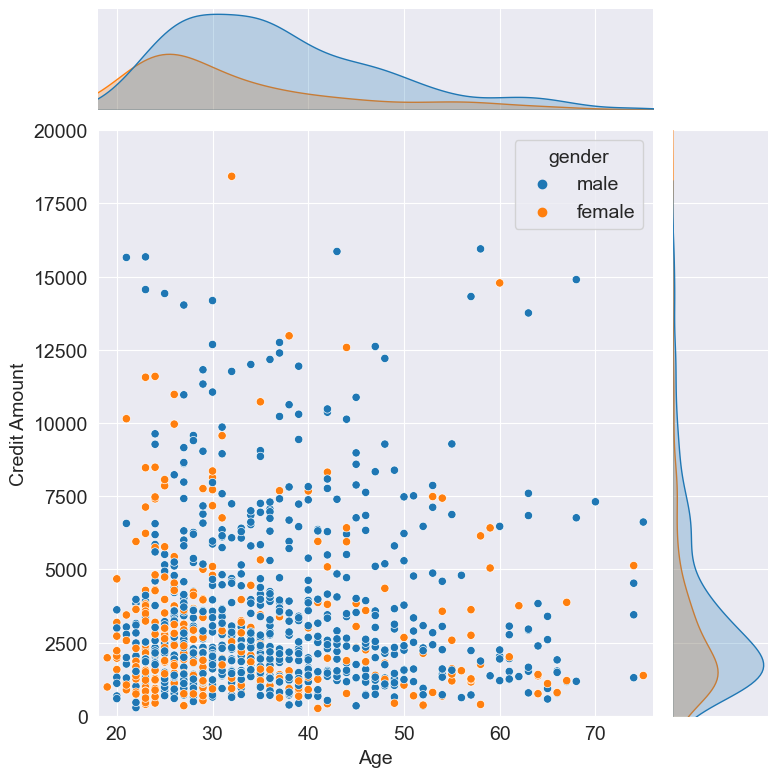

In [26]:
# Plot joint plot (scatter, KDE) for Age v/s Credit Amount by Gender
sns.jointplot(data = df_copy, x='age', y='credit_amount', kind='scatter', height=8, hue='gender', xlim=(18,76), ylim=(0,20000))
plt.ylabel('Credit Amount', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.show()

### Gender v/s Age

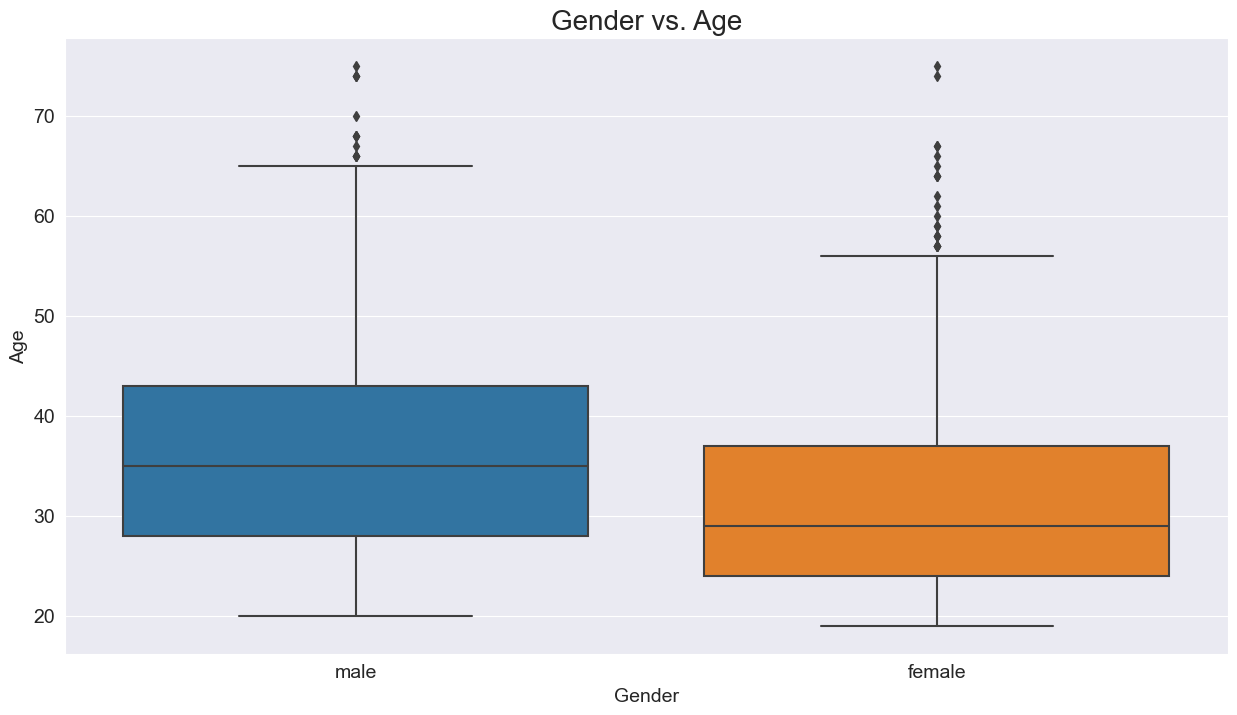

In [27]:
# Plot box plot chart for Gender v/s Age
plt.figure(figsize=(15, 8))
sns.boxplot(x='gender', y='age', data=df_copy)
plt.title('Gender vs. Age', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.show()

### Distribution of Age by Gender with Means

In [28]:
# Calculate the mean ages for males and females, and prepare the labels
male_age_mean = round(df_copy[df_copy['gender']=='male']['age'].mean(), 2)
male_age_mean_label = "Male mean: " + str(male_age_mean)
print(f"Male age mean is: {male_age_mean}")

female_age_mean = round(df_copy[df_copy['gender']=='female']['age'].mean(), 2)
female_age_mean_label = "Female mean: " + str(female_age_mean)
print(f"Female age mean is: {female_age_mean}")

Male age mean is: 36.78
Female age mean is: 32.8


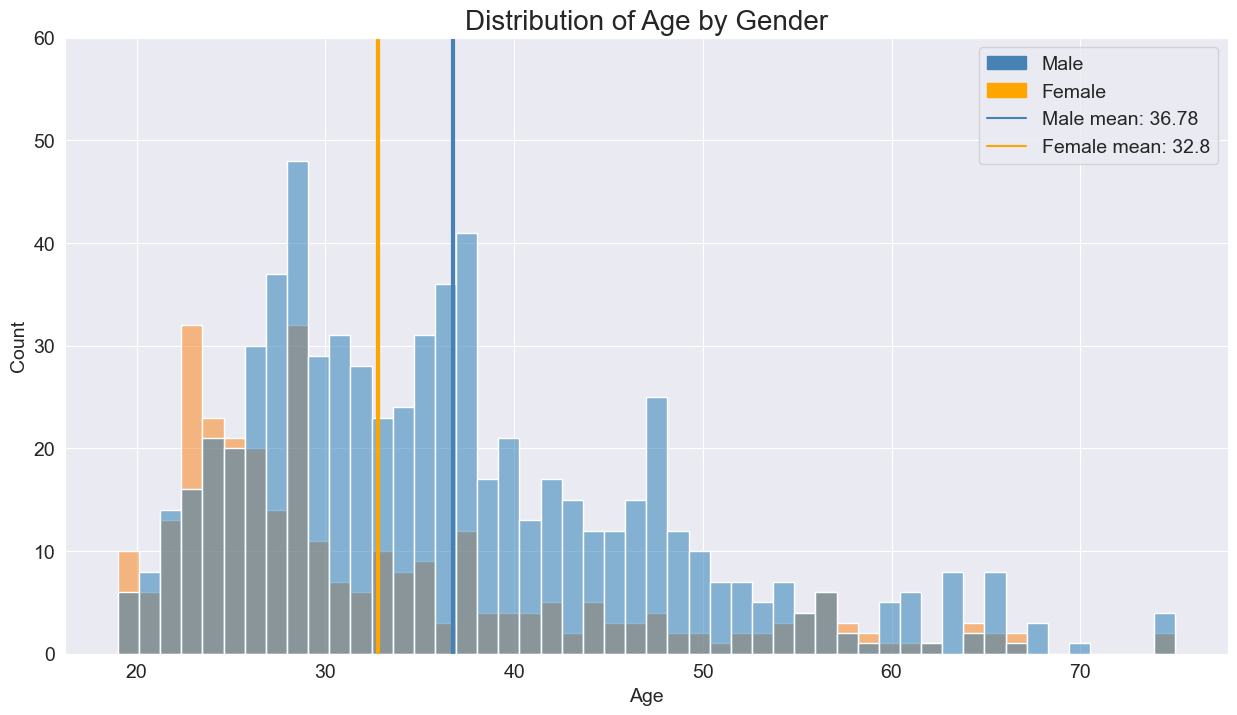

In [29]:
# Plot histogram of Age dimensioned by Gender
plt.figure(figsize=(15, 8))
sns.histplot(df_copy, x='age', hue='gender', bins=50, legend=True)
plt.title('Distribution of Age by Gender', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylim(0,60)

# Draw mean lines
plt.axvline(x = male_age_mean, color = 'steelblue', lw=3)
plt.axvline(x = female_age_mean, color = 'orange', lw=3)

# Add mean lines to legend
legend_male = mpatches.Patch(color='steelblue', label='Male')
legend_female = mpatches.Patch(color='orange', label='Female')
legend_male_mean = plt.Line2D([], [], color='steelblue', label=male_age_mean_label)
legend_female_mean = plt.Line2D([], [], color='orange', label=female_age_mean_label)

plt.legend(handles=[legend_male, legend_female, legend_male_mean, legend_female_mean])
plt.show()

### Number of Dependents v/s Age

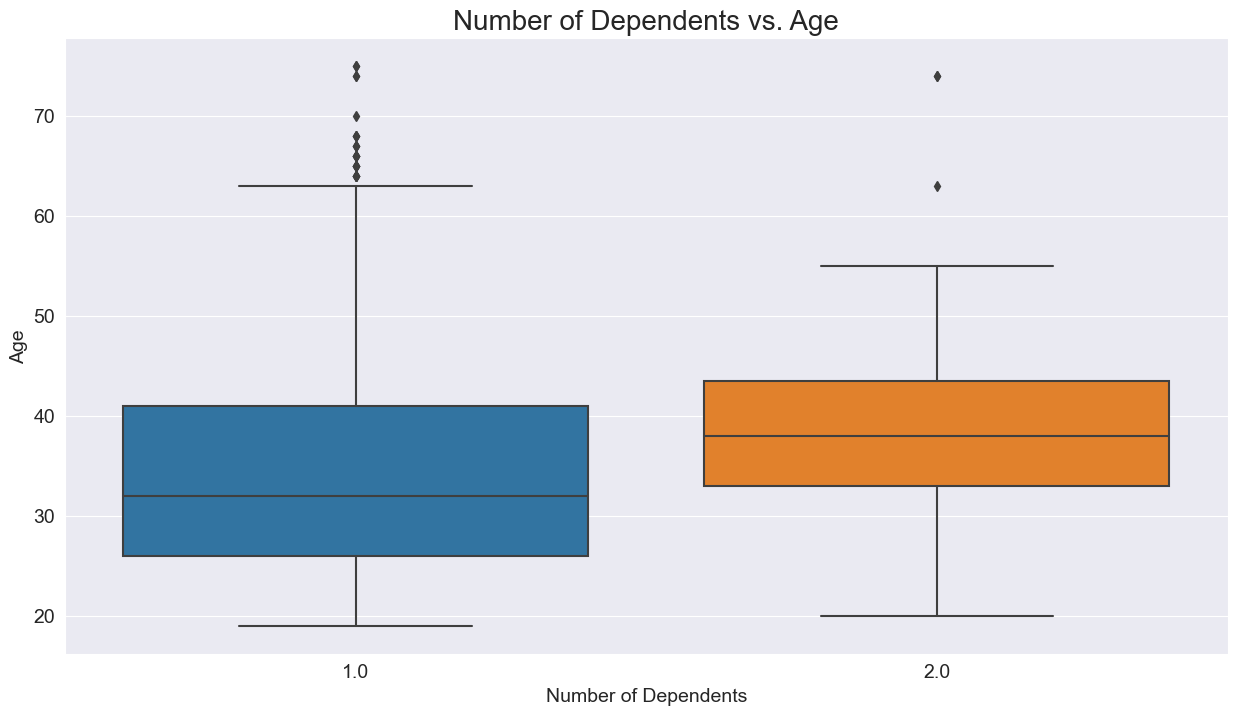

In [30]:
# Plot box plot chart for Number of Dependents v/s Age
plt.figure(figsize=(15, 8))
sns.boxplot(x='num_dependents', y='age', data=df)
plt.title('Number of Dependents vs. Age', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Number of Dependents', fontsize=14)
plt.show()

### Loan Purpose v/s Credit Amount

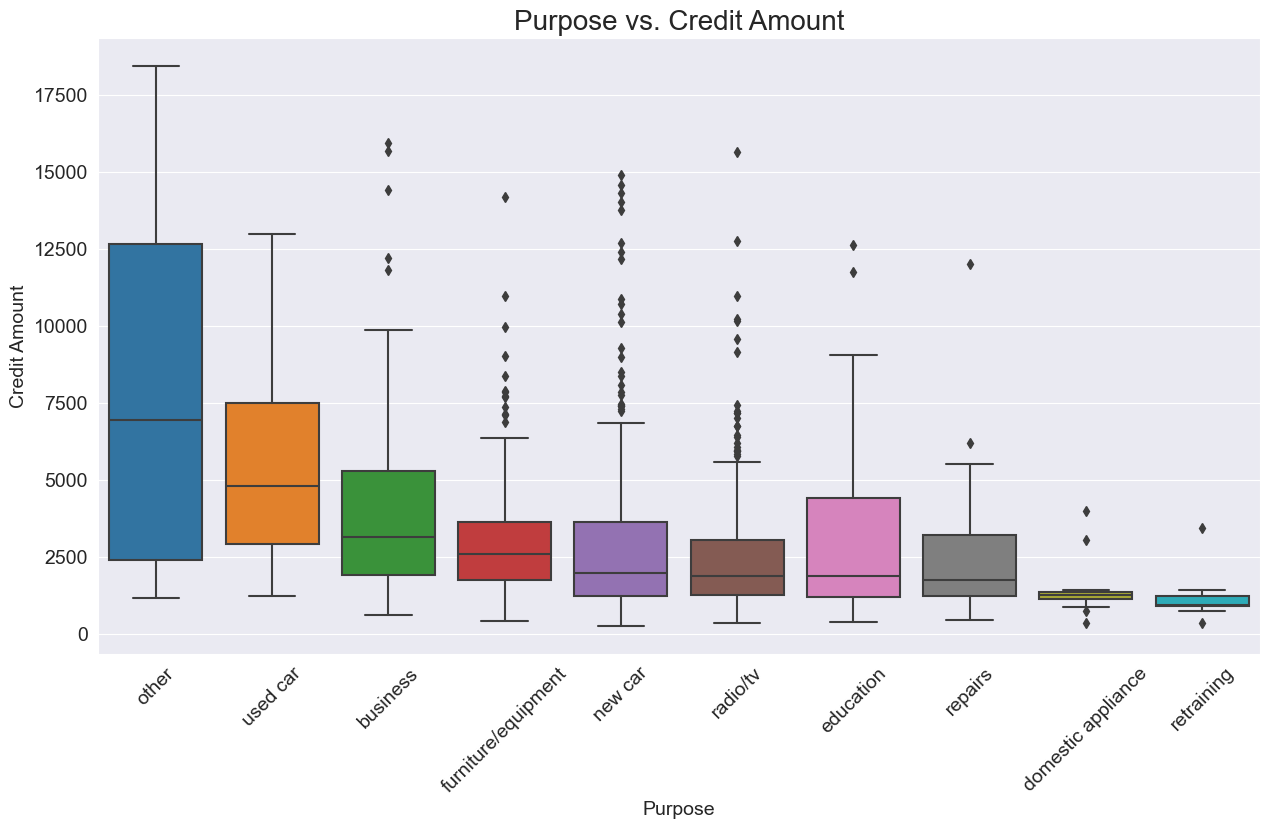

In [31]:
# Calculate the median credit_amount for each purpose
medians = df.groupby(['purpose'])['credit_amount'].median().sort_values(ascending=False)
#print(medians)

# Create a boxplot of Purpose vs. Credit Amount ordered by the medians
plt.figure(figsize=(15, 8))
sns.boxplot(x='purpose', y='credit_amount', data=df, order=medians.index)
plt.title('Purpose vs. Credit Amount', fontsize=20)
plt.ylabel('Credit Amount', fontsize=14)
plt.xlabel('Purpose', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Loan Purpose Counts by Gender

In [32]:
# How many males and females are there?
print("Totals by Gender:\n" + str(df_copy['gender'].value_counts()) + "\n")

# Calculate the counts
counts = df_copy.groupby('purpose')['gender'].value_counts().unstack().sort_values(by='male', ascending=False)
print("Purpose Counts by Gender:\n" + str(counts) + "\n")

# Calculate proportions
proportions = df_copy.groupby('gender')['purpose'].value_counts(normalize=True).unstack().T.sort_values(by='male', ascending=False)
print("Purpose Proportons by Gender:\n" + str(proportions))

Totals by Gender:
gender
male      690
female    310
Name: count, dtype: int64

Purpose Counts by Gender:
gender               female  male
purpose                          
radio/tv                 85   195
new car                  70   164
furniture/equipment      74   107
used car                 24    79
business                 19    78
education                21    29
repairs                   5    17
other                     3     9
domestic appliance        6     6
retraining                3     6

Purpose Proportons by Gender:
gender                 female      male
purpose                                
radio/tv             0.274194  0.282609
new car              0.225806  0.237681
furniture/equipment  0.238710  0.155072
used car             0.077419  0.114493
business             0.061290  0.113043
education            0.067742  0.042029
repairs              0.016129  0.024638
other                0.009677  0.013043
domestic appliance   0.019355  0.008696
retraining     

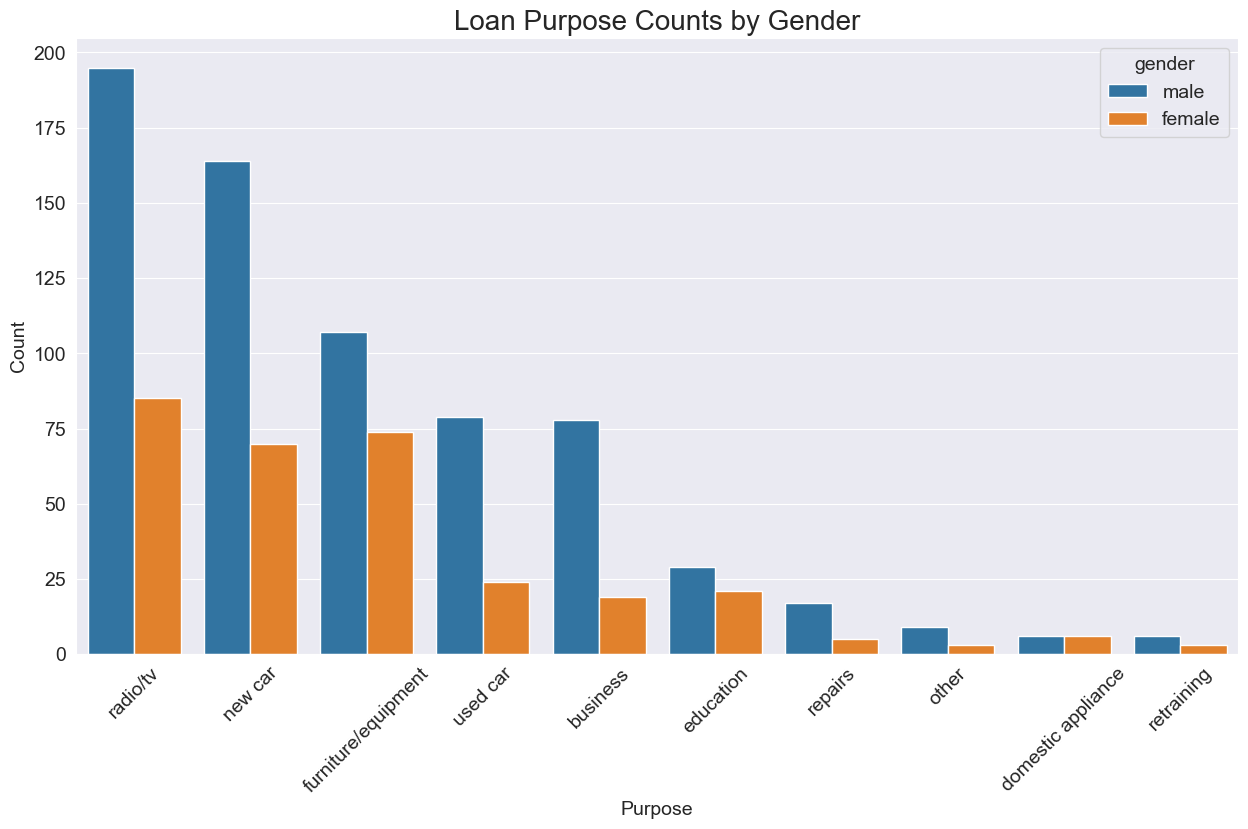

In [33]:
# Create the countplot
plt.figure(figsize=(15,8))
sns.countplot(x='purpose', hue='gender', data=df_copy, order=counts.index)
plt.title('Loan Purpose Counts by Gender', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Purpose', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Loan Purpose Proportions by Gender

* A few observations about females that aren't apparent in the chart above:
    * Females obtained a greater proportion of loans for "furniture/equipment" vs. males – this was not apparent from the count chart above!
    * Females obtained a freater proportion of loans for "education" vs. males
    * Females obtained a freater proportion of loans for "domestic appliance" vs. males
* A few observations with males as well:
    * Males obtained a greater proportion of loans for "business" vs. females
    * Males obtained a greater proportion of loans for "used car" vs. females

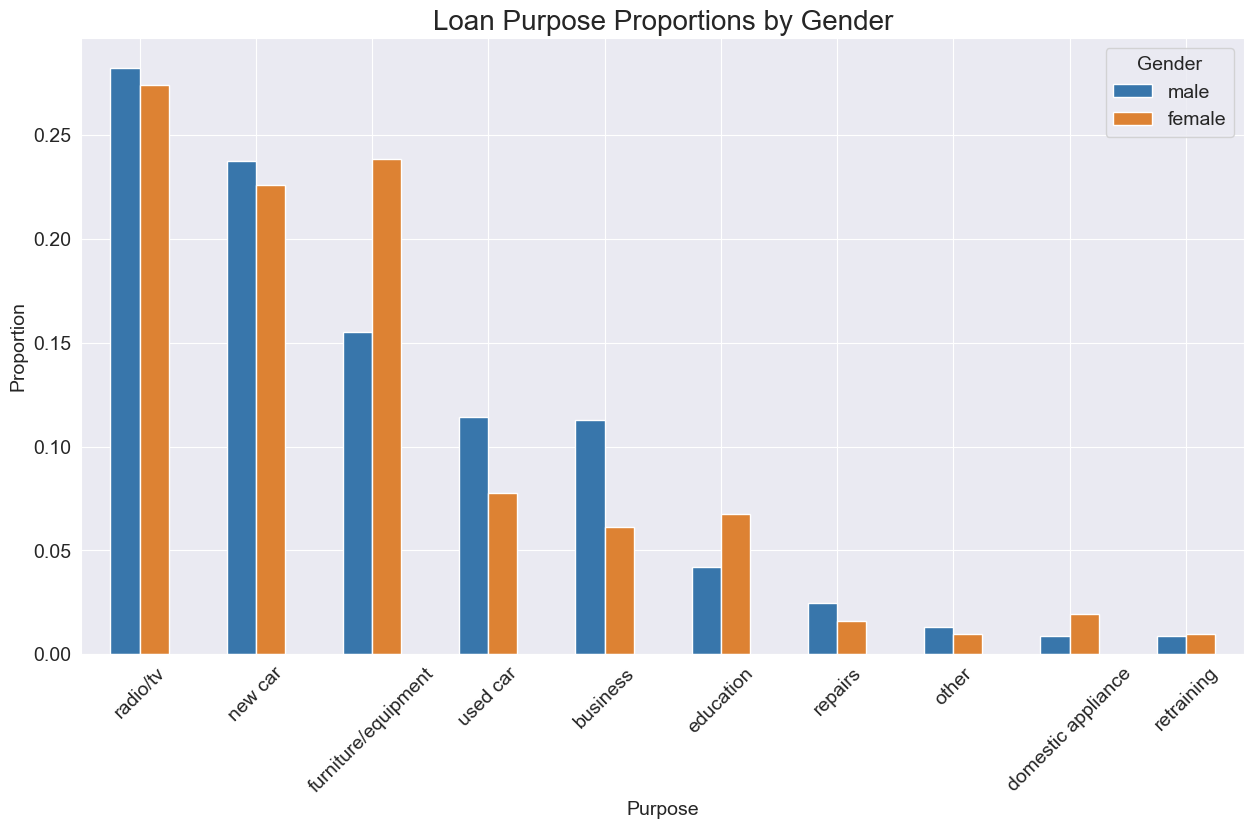

In [34]:
# Swap the columns so the charts align
proportions = proportions[['male', 'female']]

# Create the stacked bar plot
proportions.plot(kind='bar', stacked=False, figsize=(15, 8), color=['#3876AB', '#DD8233'])
plt.title('Loan Purpose Proportions by Gender', fontsize=20)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Purpose', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

### Credit History v/s Class

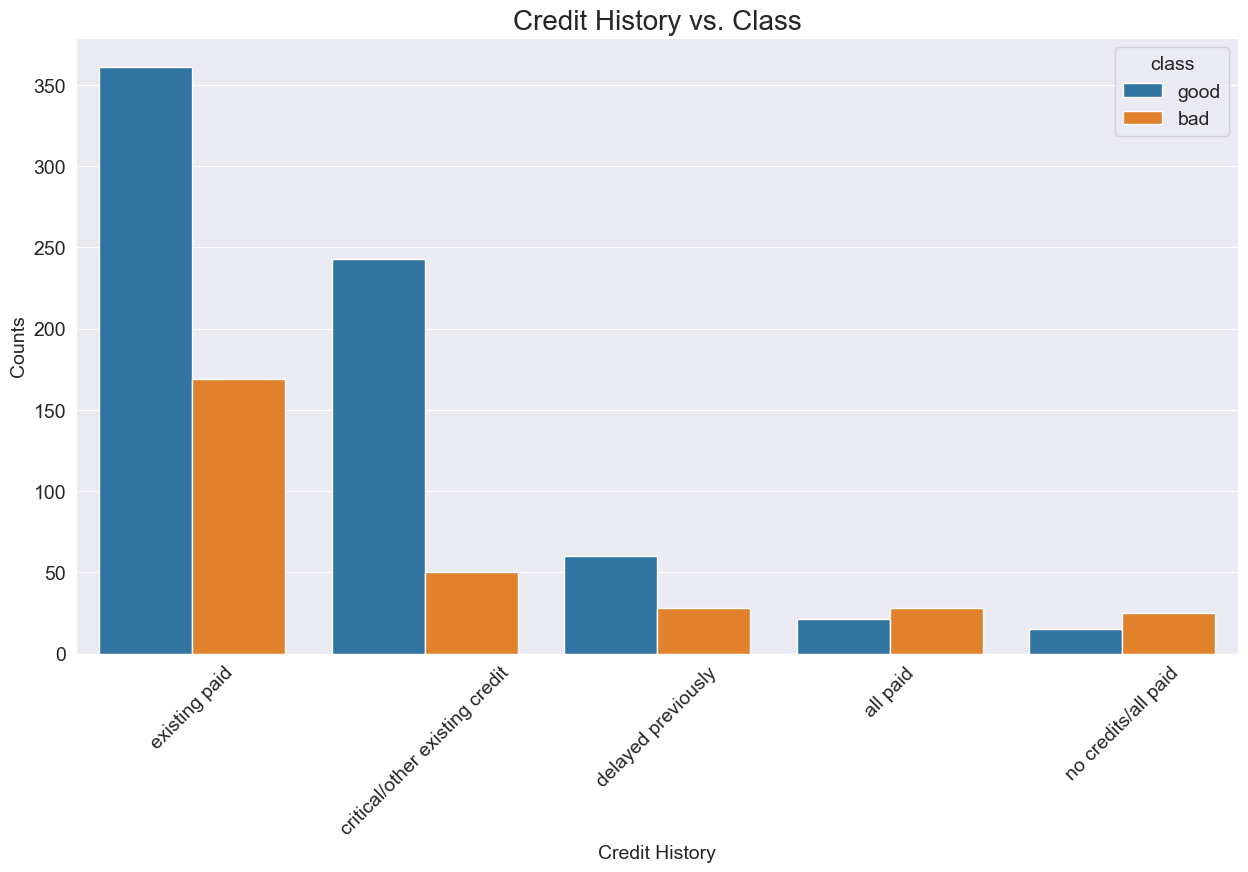

In [35]:
# Order the bars by Credit History count
history_order = df_copy.groupby('credit_history')['class'].value_counts().unstack().sort_values(by='good', ascending=False)

# Create a countplot of Credit History and Class
plt.figure(figsize=(15, 8))
sns.countplot(x='credit_history', hue='class', data=df, order=history_order.index)
plt.title('Credit History vs. Class', fontsize=20)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Credit History', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Employment v/s Class

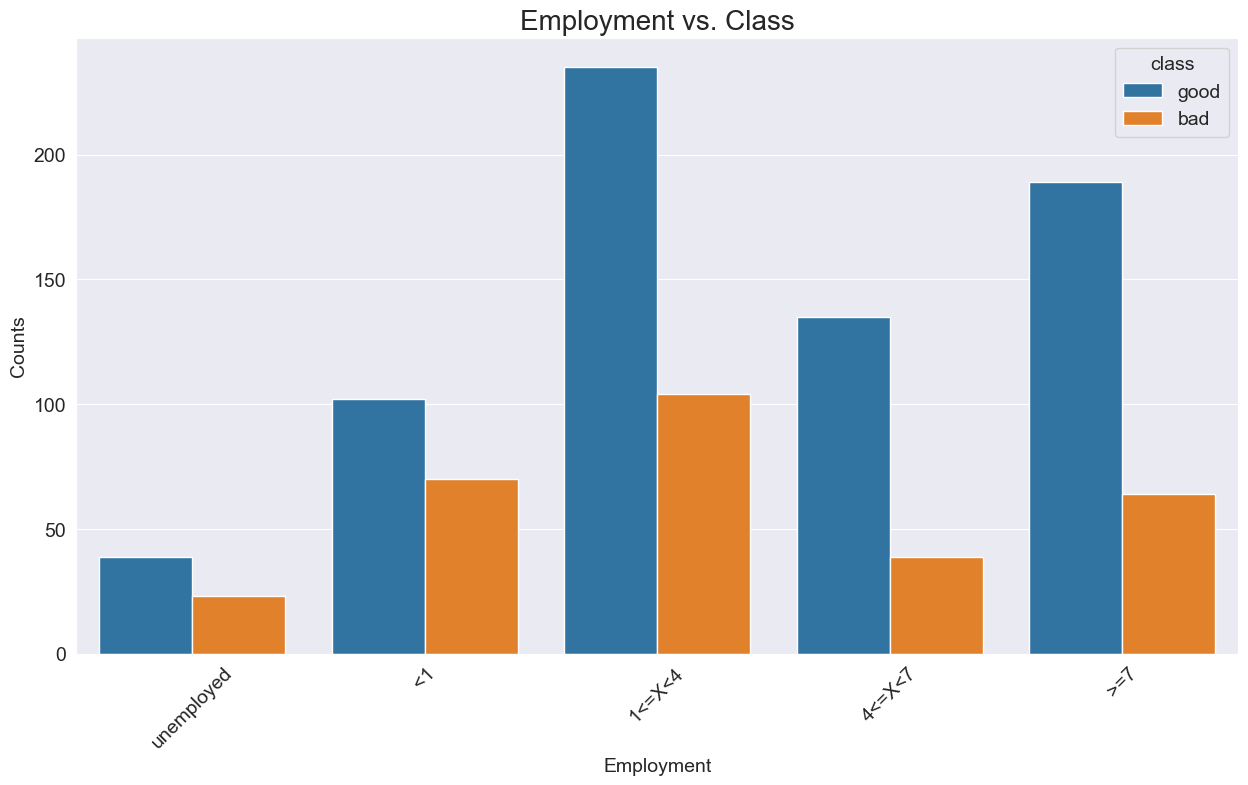

In [36]:
# Order the bars in logical order
employment_order = ["unemployed", "<1", "1<=X<4", "4<=X<7", ">=7"]


# Create a countplot of Employment and Class
plt.figure(figsize=(15, 8))
sns.countplot(x='employment', hue='class', data=df, order=employment_order)
plt.title('Employment vs. Class', fontsize=20)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Employment', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Checking and Savings Status vs. Class

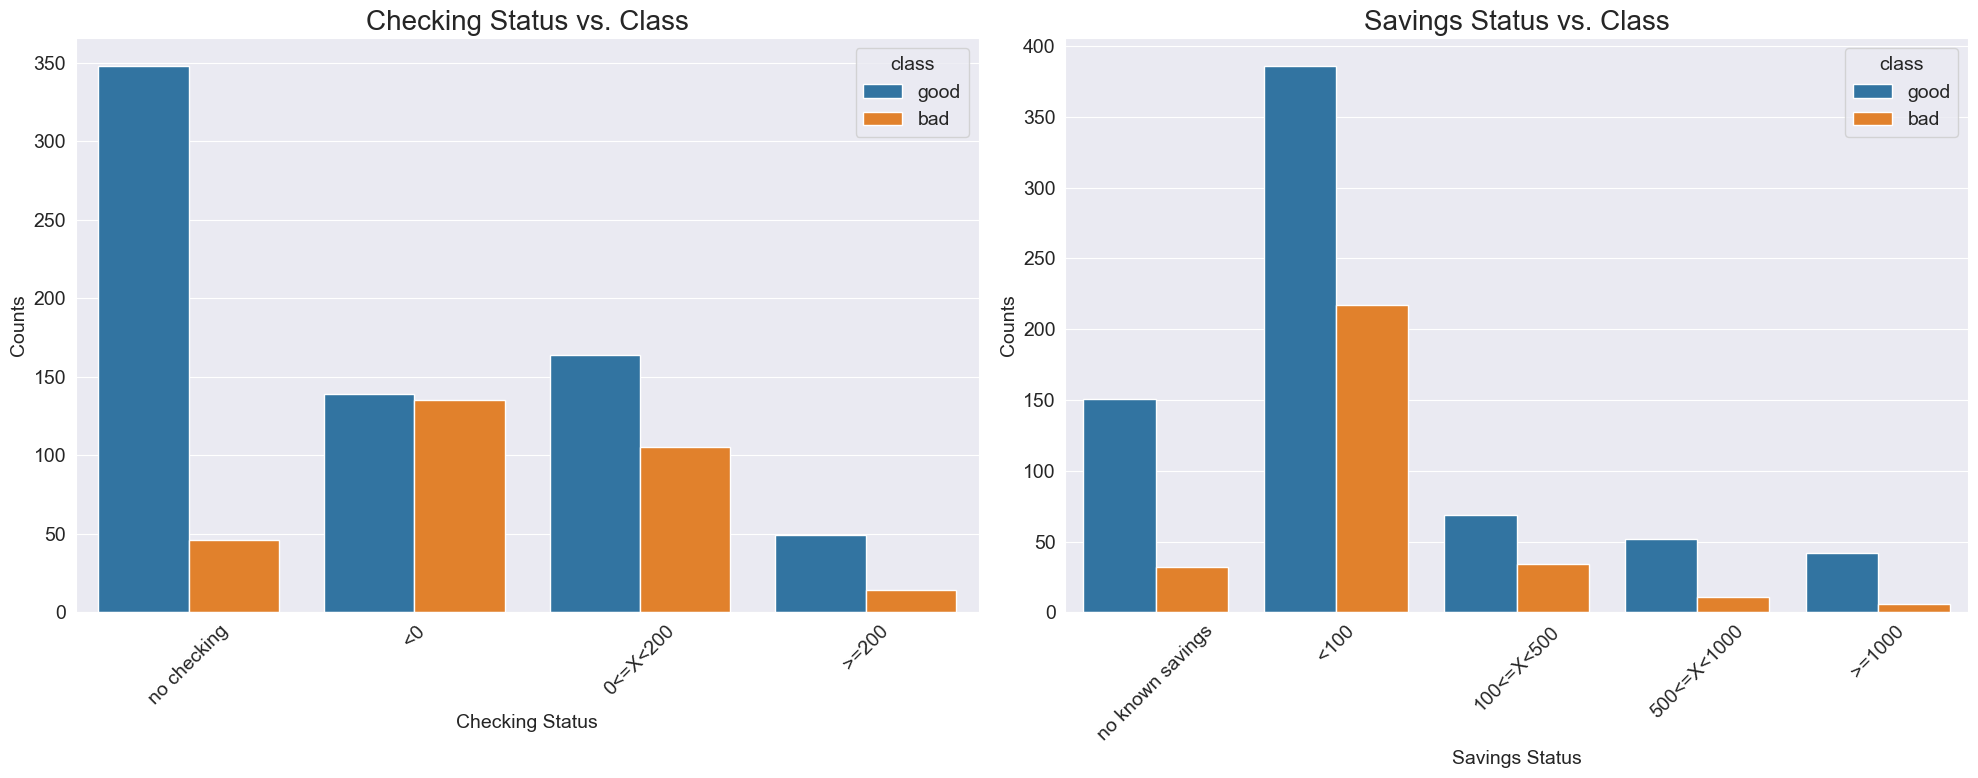

In [37]:
# Order the values logically
savings_order = ["no known savings", "<100", "100<=X<500", "500<=X<1000", ">=1000"]
checking_order = ["no checking", "<0", "0<=X<200", ">=200"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a countplot of Checking Status and Class
sns.countplot(ax=axes[0], x='checking_status', hue='class', data=df, order=checking_order)
axes[0].set_title('Checking Status vs. Class', fontsize=20)
axes[0].set_ylabel('Counts', fontsize=14)
axes[0].set_xlabel('Checking Status', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Create a countplot of Savings Status and Class
sns.countplot(ax=axes[1], x='savings_status', hue='class', data=df, order=savings_order)
axes[1].set_title('Savings Status vs. Class', fontsize=20)
axes[1].set_ylabel('Counts', fontsize=14)
axes[1].set_xlabel('Savings Status', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Conclusion

* The majority of customers have a **"good" credit class** (70%)
* Almost all are **foreign workers!** (96.3%) I do believe this dataset came from Germany
* Most are **male** (69%) **skilled workers** (63%) that **own a home** (71.3%) and have just **1 dependent** (84.5%), themselves
* The **women are younger than the men**, with most between the ages of 20 and 30
* The most popular purpose is for a **Radio or TV** (28%), followed closely by a **new car** (23.4%)
* However, **Females** obtained a greater proportion of loans for **furniture/equipment, education, and domestic appliance** vs. males
* Most customers (60.3%) have a **Savings** with **less than 100 Deutsche Mark** (1 DEM = \$0.55 USD)! No wonder they are applying for credit
* The **average credit amount** was 3,271 DEM (\$1,825 USD)
* The **largest credit amount** was for the **Other** category or purpose (6,948 DEM median), followed by **Used Car** (4,788 DEM median)
* **Credit Amount vs. Duration** have the most positive correlation, which is strong at 0.62
* **Credit Amount vs. Installment Commitment** have the most negative correlation, which is weak at -0.27k at -0.27

## References

https://www.kaggle.com/datasets/uciml/german-credit

https://github.com/Shang0612/Credit-Risk-Modeling/tree/main

https://github.com/spamula/german_credit_risk

https://github.com/allmeidaapedro/Credit-Risk-Prediction-German-Bank